<br>

# Twitter SampleCluster Analysis

# Social Network Analysis - Amber Heard Case - Twitter (Aquaman Petition)
MAHMOUD NAGY - JUNE 2022

## Table of Contents
<ul>
<li><a href="#intro"><b>Introduction</b></a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>Twitter (Aquaman Petition) - Social Network Analysis on Amber Heard's Case 

**Year: 2020, Month: (11, 'nov'), File: tweets1.json**
> This Is a Sample of a cluster containing more than 1K "Aquaman Petition Links"
> 
> **NOTE:**
> - We will use a sample cluster in this analysis
> - Then, If we want to repeat the analysis on the other clusters,
>      - We Can Choose the required graphs, and save them to to the clustering results folder 

In [1]:
import pandas as pd
import os
import json 
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objects as go
import pickle
import re
import warnings
import datetime
warnings.filterwarnings('ignore')
sb.set_style("darkgrid")
%matplotlib inline

import plotly.io as pio
pio.renderers
# pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 950
svg_renderer.height = 550


import helpers

# To Apply helpers updates without resarting the kernel
import importlib
importlib.reload(helpers)

# # To keep track of any module updates
# %load_ext autoreload
# %autoreload2

%config InlineBackend.figure_format = 'retina'

<a id='eda'></a>
## Exploratory Data Analysis
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda"><b>Exploratory Data Analysis</b></a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

> <ul>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peak Days</a></li> 
 <li><a href="#top_hours">Tweets on Peak Hours</a></li>
 <li><a href="#top_times">Tweets on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
    <li>------------------------------</li>
 <li><a href="#top_Tweeted">Top Tweeted Users</a></li>
 <li><a href="#most_follow">Users with the Most Followers</a></li>
 <li><a href="#most_frnds">Users with the Most Friends</a></li>
 <li><a href="#most_status">Users with the Most Statuses</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#top_retweet">Top Retweeted Tweets</a></li>
 <li><a href="#top_like">Tweets with Most Likes</a></li>
 <li><a href="#top_reply">Tweets with Most Replies</a></li>
 </ul>


**Year: 2020, Month: (11, 'nov'), File: tweets1.json**
> This is a sample of a cluster containing more than 1K "Aquaman Petition Links"

### Load Tweets Data

In [2]:
with open('../Clustering Results/2020 Clustering Twitter Result/data/nov/tweets1.json') as f:
    tweets1 = json.load(f)

df = pd.DataFrame(tweets1)
tweets2 = helpers.clean_data(df)
print(tweets2.shape)
tweets2.head(1)

(5169, 25)


,user_url,n_followers,n_statuses,created_at,text,user_created_at,user_screen_name,is_verified,profile_banner_url,user_location,n_friends,username,lang,profile_image_url,user_id,tweet_id,user_description,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff
4638,https://t.co/0rDo6do7uU,15612,203796,2020-11-01 00:13:39,"kate james, who in the past was employed by am...",2015-12-23 23:22:52,MyGrindelwald,False,https://pbs.twimg.com/profile_banners/45832812...,Flanders,273,Support Johnny Depp ♡ Stream City of Lies,en,http://pbs.twimg.com/profile_images/1368268947...,4583281223,1322693246594723841,♡ Depphead\n♡ @hollywoodvamps\n♡ @minamatafilm...,2020-11-01,2020,Nov,1,0,1774 days 00:50:47,1774,00:50:47


#### Retweets
A count of how many times the Tweet has been Retweeted. <br>
Please note: This does not include Quote Tweets (“Retweets with comment”). 

#### Quote Tweets
A count of how many times the Tweet has been Retweeted with a new comment (message). <br>
Please note: This does not include Retweets. <br>


**To get the “Retweets and comments” total as displayed on the Twitter clients, simply add retweet_count and quote_count. <br>
This will return the total count of Quote Tweets. There are no Quote Tweets from a paid context so all Quote Tweets are organic.**

In [3]:
# Load Tweets Metrics Data
df_metrics = pd.read_csv("../DATA/tweets_metrics_zip.csv", compression='zip')
df_metrics['id'] = df_metrics['id'].astype('str')
print(df_metrics.shape)
df_metrics.head(1)

(1604865, 6)


,id,retweet_count,reply_count,like_count,quote_count,total_count
0,951858936809951232,0,3,1,0,0


In [4]:
# Merge Tweets and Metrics
tweets = pd.merge(tweets2, df_metrics, left_on='tweet_id', right_on='id', how='left')
tweets.drop(columns='id', inplace=True)
print(tweets.shape)
tweets.head(1)

(5169, 30)


,user_url,n_followers,n_statuses,created_at,text,user_created_at,user_screen_name,is_verified,profile_banner_url,user_location,n_friends,username,lang,profile_image_url,user_id,tweet_id,user_description,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_count
0,https://t.co/0rDo6do7uU,15612,203796,2020-11-01 00:13:39,"kate james, who in the past was employed by am...",2015-12-23 23:22:52,MyGrindelwald,False,https://pbs.twimg.com/profile_banners/45832812...,Flanders,273,Support Johnny Depp ♡ Stream City of Lies,en,http://pbs.twimg.com/profile_images/1368268947...,4583281223,1322693246594723841,♡ Depphead\n♡ @hollywoodvamps\n♡ @minamatafilm...,2020-11-01,2020,Nov,1,0,1774 days 00:50:47,1774,00:50:47,12.0,1.0,68.0,0.0,12.0


In [5]:
tweets.created_at.dt.date.min(), tweets.created_at.dt.date.max()

(datetime.date(2020, 11, 1), datetime.date(2020, 11, 30))

In [6]:
tweets.lang.value_counts()

en    5169
Name: lang, dtype: int64

In [7]:
tweets.duplicated().sum()

0

---

In [8]:
# Filter on Aquaman petition Links
aquaman = tweets[tweets.text.str.contains('aquaman|petition')]
aquaman_petition = aquaman[aquaman.text.str.contains('http')]
print(aquaman_petition.shape)
aquaman_petition.head() 

(1278, 30)


,user_url,n_followers,n_statuses,created_at,text,user_created_at,user_screen_name,is_verified,profile_banner_url,user_location,n_friends,username,lang,profile_image_url,user_id,tweet_id,user_description,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_count
683,None,2408,80366,2020-11-02 15:33:10,dc entertainment: remove amber heard from aqua...,2009-11-07 10:15:40,bsbfan558,False,https://pbs.twimg.com/profile_banners/88158868...,🇺🇸🏴‍☠️#JusticeForJohnnyDepp,4597,shalana barbour,en,http://pbs.twimg.com/profile_images/1380093529...,88158868,1323287041493274624,"love wrestling (WWE) bsb, john cena and watchi...",2020-11-02,2020,Nov,2,15,4013 days 05:17:30,4013,05:17:30,0.0,0.0,0.0,0.0,0.0
913,None,102,37666,2020-11-02 19:27:34,aquaman 2 is set to have amber heard reprise h...,2018-05-25 00:39:50,freefolkbot,False,https://pbs.twimg.com/profile_banners/99981224...,"Puerto Rico, USA",1312,Free Folk Bot,en,http://pbs.twimg.com/profile_images/1120447827...,999812247294791680,1323346029312430087,Bot that posts memes from the best GoT subredd...,2020-11-02,2020,Nov,2,19,892 days 18:47:44,892,18:47:44,0.0,0.0,0.0,0.0,0.0
967,https://t.co/jx9qv6uIqa,3163,18540,2020-11-02 20:53:09,aquaman 2 is set to have amber heard reprise h...,2015-06-14 12:03:01,RedditFreeFolk,False,https://pbs.twimg.com/profile_banners/32451092...,North of the wall,51,RedditFreeFolk,en,http://pbs.twimg.com/profile_images/1121290730...,3245109242,1323367567071846400,WE SHOW SPOILERS. Official subreddit account. ...,2020-11-02,2020,Nov,2,20,1968 days 08:50:08,1968,08:50:08,0.0,1.0,2.0,0.0,0.0
977,None,1999,37410,2020-11-02 21:10:28,we're almost done! i have signed another!\ndc ...,2018-08-10 18:50:13,Stephan76215148,False,https://pbs.twimg.com/profile_banners/10279905...,USA,5000,Stephanie Brown,en,http://pbs.twimg.com/profile_images/1371277785...,1027990519769714688,1323371923548626947,😇🎶🎶😀I Am A #MichaelJackson And #JohnnyDepp Fan...,2020-11-02,2020,Nov,2,21,815 days 02:20:15,815,02:20:15,0.0,0.0,2.0,0.0,0.0
1016,None,699,12440,2020-11-02 22:26:13,dc entertainment: remove amber heard from aqua...,2010-05-02 18:28:07,KPnuts14,False,https://pbs.twimg.com/profile_banners/13947032...,UK,1557,katie power,en,http://pbs.twimg.com/profile_images/1310010092...,139470328,1323390988153425920,OH MY GOD,2020-11-02,2020,Nov,2,22,3837 days 03:58:06,3837,03:58:06,0.0,0.0,0.0,0.0,0.0


In [9]:
aquaman_petition.created_at.dt.date.min(), aquaman_petition.created_at.dt.date.max()

(datetime.date(2020, 11, 2), datetime.date(2020, 11, 30))

In [10]:
# aquaman_petition.info()

In [11]:
# helpers.isnull(aquaman_petition)

In [12]:
# aquaman_petition.dropna(subset=['text'], inplace=True)

In [13]:
for col in ['text', 'year', 'username', 'user_location', 'is_verified']:
    print('The value counts of ' + col)
    print(aquaman_petition[col].value_counts().head())
    print('\n')

The value counts of text
@sandradeanne dc entertainment: emilia clarke become mera to replace amber heard in ‘aquaman 2’\nhttps://t.co/uiibtjirmk    2
amber heard slams 'campaign' to remove her from aquaman 2 amid johnny depp drama\nhttps://t.co/arzitxkawm                   2
petition to remove amber heard from aquaman 2 crosses million-signature mark https://t.co/rekro8qsjw                        2
fans petition for amber heard to be removed from aquaman 2\n\nhttps://t.co/njdlzvmeve                                       2
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/bi9ivr3jhn via @change                2
Name: text, dtype: int64


The value counts of year
2020    1278
Name: year, dtype: int64


The value counts of username
Support Johnny Depp ♡ Stream City of Lies    127
Stephanie Brown                               63
Fercho⚡                                       25
Rohan Malviya                                 21
shalana barbour             

---

### Load Users Data

> **NOTE:**
> - All Users Data Exists in The Tweets Data

In [14]:
users1 = pd.read_csv('../Clustering Results/2020 Clustering Twitter Result/data/nov/1.csv')
users = users1.drop(columns='user.lang')
print(users.shape)
users.head(2)

(1643, 11)


,Unnamed: 0,user.id_str,user.screen_name,user.name,user.created_at,user.location,user.followers_count,user.friends_count,user.statuses_count,profile_image_url,profile_banner_url
0,122,307829313,imhaannahh,hannah,2011-05-30 11:03:05+00:00,"Bicester, England",2374,417,65245,http://pbs.twimg.com/profile_images/1365667961...,https://pbs.twimg.com/profile_banners/30782931...
1,354,72906858,DSMWcom,DSMWcom,2009-09-09 17:44:50+00:00,"Tampa, Florida",3066,2327,199319,http://pbs.twimg.com/profile_images/461156819/...,NaN


In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643 entries, 0 to 1642
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            1643 non-null   int64 
 1   user.id_str           1643 non-null   int64 
 2   user.screen_name      1643 non-null   object
 3   user.name             1642 non-null   object
 4   user.created_at       1643 non-null   object
 5   user.location         1134 non-null   object
 6   user.followers_count  1643 non-null   int64 
 7   user.friends_count    1643 non-null   int64 
 8   user.statuses_count   1643 non-null   int64 
 9   profile_image_url     1643 non-null   object
 10  profile_banner_url    1336 non-null   object
dtypes: int64(5), object(6)
memory usage: 141.3+ KB


In [16]:
users['user.id_str'] = users['user.id_str'].astype('str')
users['user.created_at'] = pd.to_datetime(users["user.created_at"], format="%Y-%m-%d %H:%M:%S+00:00") 

In [17]:
# users['profile_banner_url'].value_counts().head()

In [18]:
# users['user.id_str'].value_counts().head()

In [19]:
users['user.location'].value_counts().head()

United States      35
London             23
United Kingdom     17
Los Angeles, CA    17
London, England    16
Name: user.location, dtype: int64

<br>

In [20]:
# Filter on users in the aquaman_petition datafram
# u --> users
aquaman_petition_u = users[users['user.id_str'].isin(list(aquaman_petition.user_id))]
print(aquaman_petition_u.shape)
aquaman_petition_u.head(2)

(666, 11)


,Unnamed: 0,user.id_str,user.screen_name,user.name,user.created_at,user.location,user.followers_count,user.friends_count,user.statuses_count,profile_image_url,profile_banner_url
0,122,307829313,imhaannahh,hannah,2011-05-30 11:03:05,"Bicester, England",2374,417,65245,http://pbs.twimg.com/profile_images/1365667961...,https://pbs.twimg.com/profile_banners/30782931...
1,354,72906858,DSMWcom,DSMWcom,2009-09-09 17:44:50,"Tampa, Florida",3066,2327,199319,http://pbs.twimg.com/profile_images/461156819/...,NaN


> **NOTE:**
> - 666 users tweeted with "aquaman petition" related links

In [21]:
aquaman_petition_u['user.location'].value_counts().head(10)

United States      16
London              8
USA                 8
Los Angeles, CA     7
India               7
London, England     6
United Kingdom      5
UK                  5
Lagos, Nigeria      4
Florida, USA        4
Name: user.location, dtype: int64

In [22]:
aquaman_petition_u['profile_image_url'].value_counts().head()

http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png    24
http://pbs.twimg.com/profile_images/1365667961319682048/o8_F9CCZ_normal.jpg       1
http://pbs.twimg.com/profile_images/1380773519202643968/e9z9NSU__normal.jpg       1
http://pbs.twimg.com/profile_images/1328175685848936448/O3U_N9JF_normal.jpg       1
http://pbs.twimg.com/profile_images/877490687440281601/WHWyteyN_normal.jpg        1
Name: profile_image_url, dtype: int64

---

### Create a daily creation dataframe for "Aquaman Petition Links"

### DailyCreation (USERS)

In [23]:
tmb = pd.DataFrame(columns=['date', 'year', 'month', 'dayofmonth', 'hour'])
tmb['date'] = users['user.created_at'].dt.date
tmb['year'] = users['user.created_at'].dt.year
tmb['month'] = users['user.created_at'].dt.strftime("%b")
tmb['dayofmonth'] = users['user.created_at'].dt.day
tmb['hour'] = users['user.created_at'].dt.hour

df_creations_u = tmb.groupby(['date', 'year', 'month', 'dayofmonth', 'hour']).size().reset_index(name='#created_accounts')
df_creations_u.sort_values('#created_accounts', ascending=False, inplace=True)
df_creations_u["date"] = pd.to_datetime(df_creations_u["date"])
# print(df_creations_u.shape)
# df_creations_u.head()


In [24]:
# df_creations_u.info()

###  DailyCreation (TWEETS)

In [25]:
# # t --> tweets
df_creations_t = aquaman_petition.groupby(['date', 'year', 'month', 'dayofmonth', 'hour']).agg({'text':'count', 'user_id': 'nunique'}).reset_index(
).rename(columns={'text':'n_tweets', 'user_id':'by_#accounts'}).sort_values('n_tweets', ascending=False)

# print(df_creations_t.shape)
# df_creations_t.head()


In [26]:
# df_creations_t.info()

In [27]:
# Sorted by the number of tweets (created on each hour)
df_creations = pd.merge(df_creations_t, df_creations_u,  how='left', 
                        on=['date', 'year', 'month', 'dayofmonth', 'hour'])
print(df_creations.shape)
df_creations.head()

(390, 8)


,date,year,month,dayofmonth,hour,n_tweets,by_#accounts,#created_accounts
0,2020-11-12,2020,Nov,12,23,30,26,NaN
1,2020-11-12,2020,Nov,12,22,27,20,NaN
2,2020-11-16,2020,Nov,16,2,26,2,NaN
3,2020-11-13,2020,Nov,13,13,23,22,NaN
4,2020-11-08,2020,Nov,8,2,21,1,NaN


In [28]:
df_creations.date.min(), df_creations.date.max()

(Timestamp('2020-11-02 00:00:00'), Timestamp('2020-11-30 00:00:00'))

In [29]:
df_creations2 = pd.merge(df_creations_t, df_creations_u,  how='outer', 
                        on=['date', 'year', 'month', 'dayofmonth', 'hour'])
# print(df_creations2.shape)
# df_creations2.head()

In [30]:
# Sort by the number of created accounts (on each hour)
df_creations2.sort_values('#created_accounts', ascending=False).head(10)

,date,year,month,dayofmonth,hour,n_tweets,by_#accounts,#created_accounts
390,2020-08-28,2020,Aug,28,11,NaN,NaN,4.0
391,2019-08-22,2019,Aug,22,13,NaN,NaN,3.0
405,2011-06-12,2011,Jun,12,11,NaN,NaN,2.0
401,2011-06-30,2011,Jun,30,16,NaN,NaN,2.0
402,2014-08-11,2014,Aug,11,18,NaN,NaN,2.0
403,2014-06-04,2014,Jun,4,1,NaN,NaN,2.0
404,2007-12-07,2007,Dec,7,12,NaN,NaN,2.0
406,2009-04-23,2009,Apr,23,16,NaN,NaN,2.0
407,2020-10-30,2020,Oct,30,22,NaN,NaN,2.0
399,2016-10-09,2016,Oct,9,16,NaN,NaN,2.0


<br>

<br>

<a id='diff'></a>
> ## Tweeting Duration After Account Creation
> <ul>
 <li><a href="#diff"><b>Duration After Account Creation</b></a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peak Days</a></li> 
 <li><a href="#top_hours">Tweets on Peak Hours</a></li>
 <li><a href="#top_times">Tweets on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
    <li>------------------------------</li>
 <li><a href="#top_Tweeted">Top Tweeted Users</a></li>
 <li><a href="#most_follow">Users with the Most Followers</a></li>
 <li><a href="#most_frnds">Users with the Most Friends</a></li>
 <li><a href="#most_status">Users with the Most Statuses</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#top_retweet">Top Retweeted Tweets</a></li>
 <li><a href="#top_like">Tweets with Most Likes</a></li>
 <li><a href="#top_reply">Tweets with Most Replies</a></li>
 </ul>

>### Tweets Within the same month of Account Creation (Cluster 1 - Nov 2020)
>> <ul>
 <li><a href="#same_d">Same Day</a></li>
 <li><a href="#same_w">Same Week</a></li>
 <li><a href="#same_m">Same Month</a></li>
 </ul>

In [31]:
diff_m = tweets[tweets.days_diff < 30]
diff_m_counts = diff_m.groupby('days_diff').size().reset_index(name='n_tweets')
# diff_m_counts


Total Tweets Within the same month of Account Creation: 183


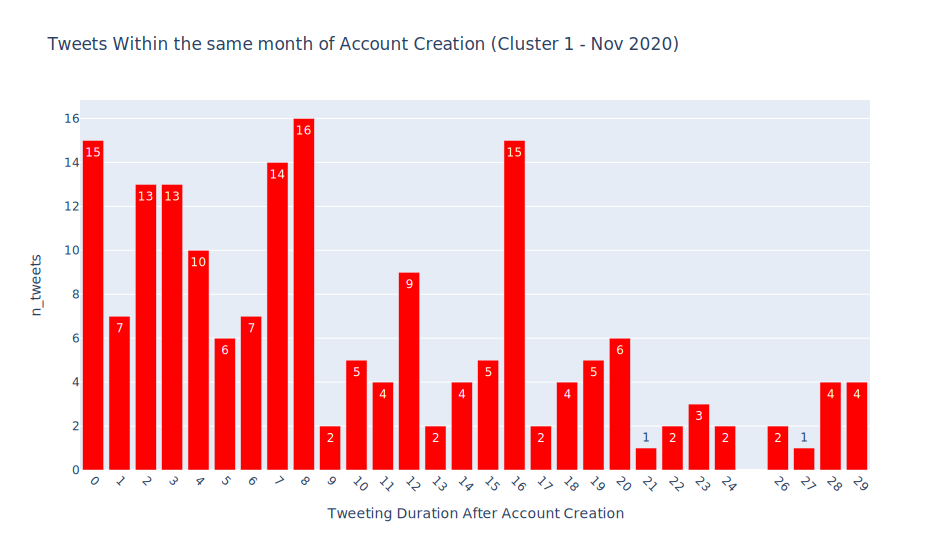

In [32]:
print(f'\nTotal Tweets Within the same month of Account Creation: {diff_m_counts.n_tweets.sum()}')
title = 'Tweets Within the same month of Account Creation (Cluster 1 - Nov 2020)'
helpers.bar_peaks(diff_m_counts, title, threshold=0, xlabel='Tweeting Duration After Account Creation')

<a id='same_d'></a>
>### The SAME DAY
>> <ul>
 <li><a href="#same_d"><b>Same Day</b></a></li>
 <li><a href="#same_w">Same Week</a></li>
 <li><a href="#same_m">Same Month</a></li>
 </ul>

In [33]:
print('The number of accounts tweeted the same day they was created!')
tweets[tweets['days_diff'] == 0].shape[0]

The number of accounts tweeted the same day they was created!


15

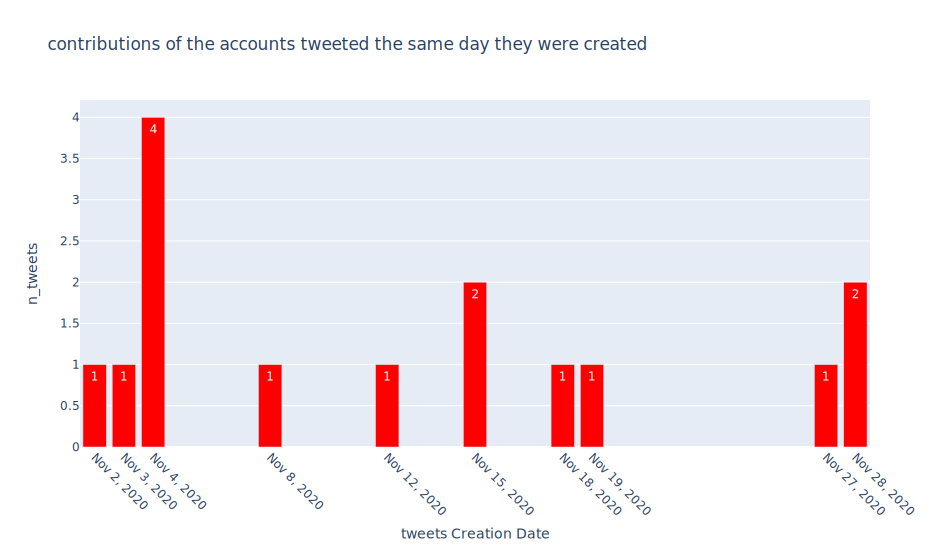

In [34]:
title = 'contributions of the accounts tweeted the same day they were created'
df = tweets[tweets['days_diff'] == 0].groupby('date').size().reset_index(name='n_tweets')
helpers.bar_peaks(df, title, threshold=0, xlabel='tweets Creation Date')

In [35]:
tweets[tweets['days_diff'] == 0].username.value_counts()

MrKnowItAll                            2
gab ☮︎ ٭                               2
teddington                             2
Emma Wells Tennis in Wimbledon Park    1
Erika Bestor                           1
Lindsey Depp                           1
James                                  1
Read Hearing                           1
chrystalneveah                         1
Mistica Davis 🇺🇸🏴‍☠️                   1
ASTIG List                             1
mash                                   1
Name: username, dtype: int64

In [36]:
tweets[tweets['days_diff'] == 0].text.value_counts()

timeline of johnny depp and amber heard's relationship - wimbledon guardian https://t.co/4gedilk4ih                                                                                                                                                                                                         1
@mygrindelwald i have never wanted this more than i do now. amber is a disgrace! #amberheardisanabuser                                                                                                                                                                                                      1
@dior dear dior regarding my husband to be's future of the amazing sauvage ad please keep him employed as the face of sauvage.  what happened in the  barrack result of his libel case against the sun and dan wootton and amber heard are just ganging up on him.                                          1
hi everyone, here i will write on popular topics, currently about the trial  johnny depp and a

>**NOTE:**
>- Most of the (user_url)s are None
>- Might be banned or deleted

In [37]:
tweets[tweets['days_diff'] == 0]

,user_url,n_followers,n_statuses,created_at,text,user_created_at,user_screen_name,is_verified,profile_banner_url,user_location,n_friends,username,lang,profile_image_url,user_id,tweet_id,user_description,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_count
489,https://t.co/bNl9CfETss,6,3265,2020-11-02 13:27:21,timeline of johnny depp and amber heard's rela...,2020-11-01 13:31:08,coach_wimbledon,False,https://pbs.twimg.com/profile_banners/13228935...,"Wimbledon Park, London",39,Emma Wells Tennis in Wimbledon Park,en,http://pbs.twimg.com/profile_images/1322894157...,1322893517455314953,1323255376989532160,Tennis for life! Junior and adult tennis coach...,2020-11-02,2020,Nov,2,13,0 days 23:56:13,0,23:56:13,0.0,0.0,0.0,0.0,0.0
1175,None,5,55,2020-11-03 06:31:48,@mygrindelwald i have never wanted this more t...,2020-11-02 17:00:53,BestorErika,False,https://pbs.twimg.com/profile_banners/13233090...,,11,Erika Bestor,en,http://pbs.twimg.com/profile_images/1323514442...,1323309075535257600,1323513188311158785,Disabled musical person trying to bring justic...,2020-11-03,2020,Nov,3,6,0 days 13:30:55,0,13:30:55,0.0,0.0,0.0,0.0,0.0
1476,None,16,504,2020-11-04 07:39:48,@dior dear dior regarding my husband to be's f...,2020-11-03 23:49:31,LindseyDepp2,False,None,,34,Lindsey Depp,en,http://pbs.twimg.com/profile_images/1323775158...,1323774161110683648,1323892689696366593,I'm unique,2020-11-04,2020,Nov,4,7,0 days 07:50:17,0,07:50:17,0.0,0.0,0.0,0.0,0.0
1483,None,1,4,2020-11-04 10:16:53,"hi everyone, here i will write on popular topi...",2020-11-04 09:59:30,James84045606,False,None,,0,James,en,http://pbs.twimg.com/profile_images/1324280272...,1323927710054424576,1323932219870793731,"люблю хорошие игры, фильмы и книги, играю на г...",2020-11-04,2020,Nov,4,10,0 days 00:17:23,0,00:17:23,0.0,0.0,2.0,0.0,0.0
1493,None,160,2547,2020-11-04 13:43:39,johnny depp loses london libel case involving ...,2020-11-03 21:27:10,MrKnowI00143571,False,https://pbs.twimg.com/profile_banners/13237383...,,982,MrKnowItAll,en,http://pbs.twimg.com/profile_images/1336318046...,1323738360767148032,1323984256457089025,I Know Everything,2020-11-04,2020,Nov,4,13,0 days 16:16:29,0,16:16:29,0.0,0.0,0.0,0.0,0.0
1494,None,160,2547,2020-11-04 13:45:15,judge rules a pet likely pooped in johnny depp...,2020-11-03 21:27:10,MrKnowI00143571,False,https://pbs.twimg.com/profile_banners/13237383...,,982,MrKnowItAll,en,http://pbs.twimg.com/profile_images/1336318046...,1323738360767148032,1323984658200080386,I Know Everything,2020-11-04,2020,Nov,4,13,0 days 16:18:05,0,16:18:05,0.0,0.0,1.0,0.0,0.0
2289,None,20,244,2020-11-08 00:43:23,@kamalaharris together like johnny depp and am...,2020-11-07 12:29:17,read_hearing,False,https://pbs.twimg.com/profile_banners/13250525...,United States,299,Read Hearing,en,http://pbs.twimg.com/profile_images/1325254863...,1325052500844613632,1325237445110231040,What government wants government takes | Quest...,2020-11-08,2020,Nov,8,0,0 days 12:14:06,0,12:14:06,0.0,0.0,0.0,0.0,0.0
2968,None,5,8,2020-11-12 01:45:48,the johnny depp amber heard case is why men st...,2020-11-12 01:38:17,chrystalneveah1,False,None,,7,chrystalneveah,en,http://pbs.twimg.com/profile_images/1326700944...,1326700765012873218,1326702705042075648,❤️I hope karma slaps you in the face before I ...,2020-11-12,2020,Nov,12,1,0 days 00:07:31,0,00:07:31,0.0,0.0,0.0,0.0,0.0
3728,https://t.co/tMeUBroSNX,1181,10930,2020-11-15 06:07:15,i wonder how it feels to know i’ve caused emot...,2020-11-14 23:12:16,J0HNNYPUFF,False,https://pbs.twimg.com/profile_banners/13277511...,,787,gab ☮︎ ٭,en,http://pbs.twimg.com/profile_images/1379920220...,1327751198305345536,1327855664614559744,#LEIA : “ well i guess you don’t know everythi...,2020-11-15,2020,Nov,15,6,0 days 06:54:59,0,06:54:59,NaN,NaN,NaN,NaN,NaN
3777,https://t.co/tMeUBroSNX,1181,10930,2020-11-15 20:23:42,i think pinocchio is a better liar than amber ...,2020-11-14 23:12:16,J0HNNYPUFF,Fals

>**NOTE:**
>- "chrystalneveah", "mash" tweeted after 7 minutes of account creation

In [38]:
tweets[tweets['username'].isin(["chrystalneveah", "mash"])]

,user_url,n_followers,n_statuses,created_at,text,user_created_at,user_screen_name,is_verified,profile_banner_url,user_location,n_friends,username,lang,profile_image_url,user_id,tweet_id,user_description,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_count
2968,None,5,8,2020-11-12 01:45:48,the johnny depp amber heard case is why men st...,2020-11-12 01:38:17,chrystalneveah1,False,None,,7,chrystalneveah,en,http://pbs.twimg.com/profile_images/1326700944...,1326700765012873218,1326702705042075648,❤️I hope karma slaps you in the face before I ...,2020-11-12,2020,Nov,12,1,0 days 00:07:31,0,00:07:31,0.0,0.0,0.0,0.0,0.0
4905,None,0,17,2020-11-28 08:43:49,no amber heard is not replacing brie larson or...,2020-11-28 08:36:47,mash74754943,False,None,,0,mash,en,http://abs.twimg.com/sticky/default_profile_im...,1332604316654383104,1332606110289829888,,2020-11-28,2020,Nov,28,8,0 days 00:07:02,0,00:07:02,0.0,0.0,1.0,0.0,0.0


In [39]:
tweets[tweets['username'].isin(["chrystalneveah", "mash"])].user_description.value_counts()

❤️I hope karma slaps you in the face before I do❤️    1
                                                      1
Name: user_description, dtype: int64

In [40]:
tweets[tweets['username'].isin(["chrystalneveah", "mash"])].text.value_counts()

the johnny depp amber heard case is why men stay silent https://t.co/yanmhqezpm via @youtube                                1
no amber heard is not replacing brie larson or joining the mcu (a rant) https://t.co/0yzvst469a via @youtube brie larson    1
Name: text, dtype: int64

<a id='same_w'></a>
>### The SAME WEEK
>> <ul>
 <li><a href="#same_d">Same Day</a></li>
 <li><a href="#same_w"><b>Same Week</b></a></li>
 <li><a href="#same_m">Same Month</a></li>
 </ul>

In [41]:
print('The number of accounts tweeted the same week they was created!')
tweets[tweets['days_diff'] <= 7].shape[0]

The number of accounts tweeted the same week they was created!


85

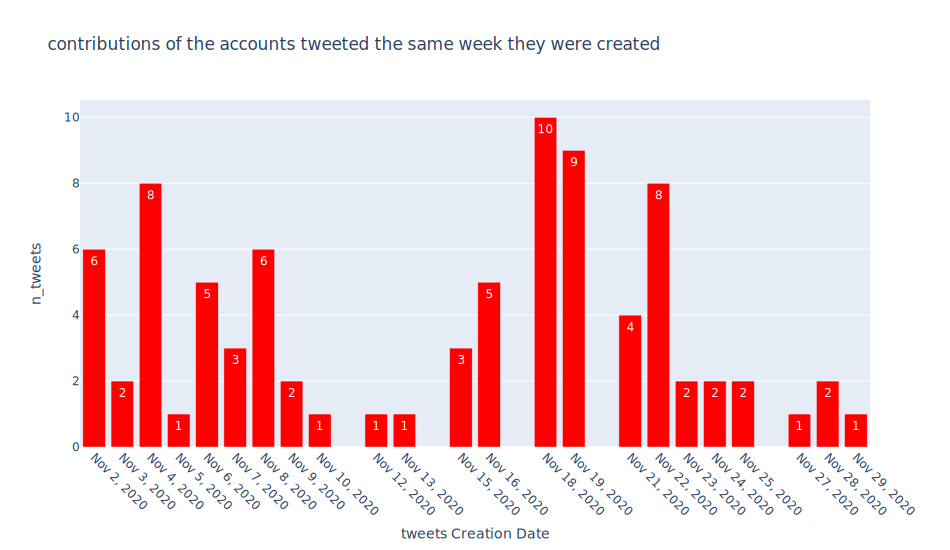

In [42]:
title = 'contributions of the accounts tweeted the same week they were created'
df = tweets[tweets['days_diff'] <= 7].groupby('date').size().reset_index(name='n_tweets')
helpers.bar_peaks(df, title, threshold=0, xlabel='tweets Creation Date')

<br>

### "Aquaman Petition Links" --> same week

In [43]:
print('The number of accounts tweeted "Aquaman Petition Links" the same week they was created!')
aquaman_petition[aquaman_petition['days_diff'] <= 7].shape[0]

The number of accounts tweeted "Aquaman Petition Links" the same week they was created!


6

In [44]:
aquaman_petition[aquaman_petition['days_diff'] <= 7].username.value_counts()

Erika Bestor    4
DailyNews       1
Oneida          1
Name: username, dtype: int64

>**NOTE:**
>- Erika Bestor user_url is None
>- Might be banned or deleted

In [45]:
aquaman_petition[aquaman_petition['days_diff'] <= 7].text.value_counts()

dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/ghd8zegee5 via @change                                                                                            1
l'oréal: remove amber heard as l'oreal spokesperson - sign the petition! https://t.co/9yvy9ssrc5 via @change                                                                                            1
all decent human beings who believe in justice: boycott warner brothers for removing johnny depp but keeping amber heard - sign the petition! https://t.co/gjmoiwgcnh via @change                       1
i will be posting all of the petitions that need to be signed. let's send a message to survivors that they count and this abuser needs to be gone!! #justiceforjohnnydepp\n\nhttps://t.co/xridvbfn9u    1
amber heard responds to calls for her removal from ‘aquaman 2’ https://t.co/tgrxqd1rj4                                                                                                          

In [46]:
aquaman_petition[aquaman_petition['days_diff'] <= 7]

,user_url,n_followers,n_statuses,created_at,text,user_created_at,user_screen_name,is_verified,profile_banner_url,user_location,n_friends,username,lang,profile_image_url,user_id,tweet_id,user_description,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_count
1527,None,5,55,2020-11-04 20:09:00,dc entertainment: remove amber heard from aqua...,2020-11-02 17:00:53,BestorErika,False,https://pbs.twimg.com/profile_banners/13233090...,,11,Erika Bestor,en,http://pbs.twimg.com/profile_images/1323514442...,1323309075535257600,1324081232418725888,Disabled musical person trying to bring justic...,2020-11-04,2020,Nov,4,20,2 days 03:08:07,2,03:08:07,0.0,0.0,0.0,0.0,0.0
1613,None,5,55,2020-11-06 06:10:53,l'oréal: remove amber heard as l'oreal spokesp...,2020-11-02 17:00:53,BestorErika,False,https://pbs.twimg.com/profile_banners/13233090...,,11,Erika Bestor,en,http://pbs.twimg.com/profile_images/1323514442...,1323309075535257600,1324595090086531072,Disabled musical person trying to bring justic...,2020-11-06,2020,Nov,6,6,3 days 13:10:00,3,13:10:00,1.0,0.0,1.0,0.0,1.0
1758,None,5,55,2020-11-06 18:22:11,all decent human beings who believe in justice...,2020-11-02 17:00:53,BestorErika,False,https://pbs.twimg.com/profile_banners/13233090...,,11,Erika Bestor,en,http://pbs.twimg.com/profile_images/1323514442...,1323309075535257600,1324779127174393858,Disabled musical person trying to bring justic...,2020-11-06,2020,Nov,6,18,4 days 01:21:18,4,01:21:18,0.0,0.0,2.0,0.0,0.0
2435,None,5,55,2020-11-08 20:18:58,i will be posting all of the petitions that ne...,2020-11-02 17:00:53,BestorErika,False,https://pbs.twimg.com/profile_banners/13233090...,,11,Erika Bestor,en,http://pbs.twimg.com/profile_images/1323514442...,1323309075535257600,1325533290397200384,Disabled musical person trying to bring justic...,2020-11-08,2020,Nov,8,20,6 days 03:18:05,6,03:18:05,0.0,0.0,0.0,0.0,0.0
3471,https://t.co/4FriMh7zmu,0,1386,2020-11-13 15:58:56,amber heard responds to calls for her removal ...,2020-11-10 10:45:41,floordailynews,False,None,India,0,DailyNews,en,http://pbs.twimg.com/profile_images/1326116183...,1326113749195894784,1327279790160744449,Daily News Portal,2020-11-13,2020,Nov,13,15,3 days 05:13:15,3,05:13:15,0.0,0.0,0.0,0.0,0.0
4423,None,0,13,2020-11-23 19:06:02,aquaman 2 petition update - with the human cre...,2020-11-15 20:06:06,Oneida16548554,False,None,,34,Oneida,en,http://pbs.twimg.com/profile_images/1328066983...,1328066687426572290,1330950755231145988,,2020-11-23,2020,Nov,23,19,7 days 22:59:56,7,22:59:56,0.0,0.0,0.0,0.0,0.0


<a id='same_m'></a>
>### The SAME MONTH
>> <ul>
 <li><a href="#same_d">Same Day</a></li>
 <li><a href="#same_w">Same Week</a></li>
 <li><a href="#same_m"><b>Same Month</b></a></li>
 </ul>

In [47]:
print('The number of accounts tweeted "Aquaman Petition Links" the same month they was created!')
aquaman_petition[aquaman_petition['days_diff'] <= 30].shape[0]

The number of accounts tweeted "Aquaman Petition Links" the same month they was created!


23

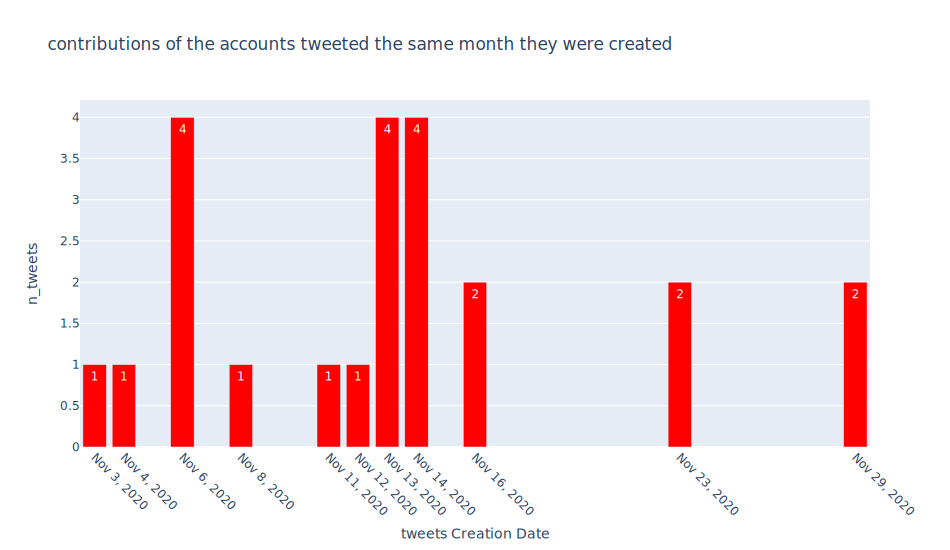

In [48]:
title = 'contributions of the accounts tweeted the same month they were created'
df = aquaman_petition[aquaman_petition['days_diff'] <= 30].groupby('date').size().reset_index(name='n_tweets')
helpers.bar_peaks(df, title, threshold=0, xlabel='tweets Creation Date')

In [49]:
aquaman_petition[aquaman_petition['days_diff'] <= 30].username.value_counts()

Erika Bestor                                       5
Anghel                                             2
steelking                                          2
mick                                               2
Lindsey Depp                                       2
#RestoreTheSnyderVerse                             1
TechiUpdate                                        1
@moviesblogs                                       1
uDOu                                               1
DailyNews                                          1
s♄elby renn rusalka 🌙♇                             1
Cantando rancheras Joaquin Leal Jimenez Juaquin    1
Promagzine.com                                     1
Oneida                                             1
b miller                                           1
Name: username, dtype: int64

In [50]:
aquaman_petition[aquaman_petition['days_diff'] <= 30].text.value_counts()

britain : justice nicol needs to be fired! justice for male da survivors! - sign the petition! #justiceforjohnnydepp #amberheardisaliar  https://t.co/hwvy4ftgp4 via @change                                                                              1
replace amber heard with bryce dallas howard to play mera in aquaman 2... also give bryce her own star wars movie ❤ https://t.co/xt80nta0ww                                                                                                               1
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/hr1l7amdsk via @change                                                                                                                                              1
aquaman 2 petition update - with the human creator! #justiceforjohnnydepp https://t.co/rh7334ulmz via @youtube                                                                                                                                      

In [51]:
aquaman_petition[aquaman_petition['days_diff'] <= 30]

,user_url,n_followers,n_statuses,created_at,text,user_created_at,user_screen_name,is_verified,profile_banner_url,user_location,n_friends,username,lang,profile_image_url,user_id,tweet_id,user_description,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_count
1131,https://t.co/OK5jGajTS6,1,8,2020-11-03 02:12:38,britain : justice nicol needs to be fired! jus...,2020-10-14 06:17:54,AnghelStryker,False,https://pbs.twimg.com/profile_banners/13162618...,"Missouri, USA",21,Anghel,en,http://pbs.twimg.com/profile_images/1316270438...,1316261881405935616,1323447966804463617,"I'm just a weird 20 year old who loves gaming,...",2020-11-03,2020,Nov,3,2,19 days 19:54:44,19,19:54:44,NaN,NaN,NaN,NaN,NaN
1527,None,5,55,2020-11-04 20:09:00,dc entertainment: remove amber heard from aqua...,2020-11-02 17:00:53,BestorErika,False,https://pbs.twimg.com/profile_banners/13233090...,,11,Erika Bestor,en,http://pbs.twimg.com/profile_images/1323514442...,1323309075535257600,1324081232418725888,Disabled musical person trying to bring justic...,2020-11-04,2020,Nov,4,20,2 days 03:08:07,2,03:08:07,0.0,0.0,0.0,0.0,0.0
1613,None,5,55,2020-11-06 06:10:53,l'oréal: remove amber heard as l'oreal spokesp...,2020-11-02 17:00:53,BestorErika,False,https://pbs.twimg.com/profile_banners/13233090...,,11,Erika Bestor,en,http://pbs.twimg.com/profile_images/1323514442...,1323309075535257600,1324595090086531072,Disabled musical person trying to bring justic...,2020-11-06,2020,Nov,6,6,3 days 13:10:00,3,13:10:00,1.0,0.0,1.0,0.0,1.0
1724,https://t.co/OK5jGajTS6,1,8,2020-11-06 17:44:49,dc entertainment: remove amber heard from aqua...,2020-10-14 06:17:54,AnghelStryker,False,https://pbs.twimg.com/profile_banners/13162618...,"Missouri, USA",21,Anghel,en,http://pbs.twimg.com/profile_images/1316270438...,1316261881405935616,1324769723721146381,"I'm just a weird 20 year old who loves gaming,...",2020-11-06,2020,Nov,6,17,23 days 11:26:55,23,11:26:55,NaN,NaN,NaN,NaN,NaN
1758,None,5,55,2020-11-06 18:22:11,all decent human beings who believe in justice...,2020-11-02 17:00:53,BestorErika,False,https://pbs.twimg.com/profile_banners/13233090...,,11,Erika Bestor,en,http://pbs.twimg.com/profile_images/1323514442...,1323309075535257600,1324779127174393858,Disabled musical person trying to bring justic...,2020-11-06,2020,Nov,6,18,4 days 01:21:18,4,01:21:18,0.0,0.0,2.0,0.0,0.0
1910,https://t.co/Fymqtxs13p,119,5482,2020-11-06 22:25:53,"as a lifelong, obsessive geoff johns and dc su...",2020-10-17 21:59:07,theSnyderLeague,False,https://pbs.twimg.com/profile_banners/13175858...,TMZ for TPZ,133,#RestoreTheSnyderVerse,en,http://pbs.twimg.com/profile_images/1374163980...,1317585888155701249,1324840456082100226,"Follow us for all the latest headlines, drama,...",2020-11-06,2020,Nov,6,22,20 days 00:26:46,20,00:26:46,NaN,NaN,NaN,NaN,NaN
2435,None,5,55,2020-11-08 20:18:58,i will be posting all of the petitions that ne...,2020-11-02 17:00:53,BestorErika,False,https://pbs.twimg.com/profile_banners/13233090...,,11,Erika Bestor,en,http://pbs.twimg.com/profile_images/1323514442...,1323309075535257600,1325533290397200384,Disabled musical person trying to bring justic...,2020-11-08,2020,Nov,8,20,6 days 03:18:05,6,03:18:05,0.0,0.0,0.0,0.0,0.0
2951,https://t.co/aSnR9l7FVB,156,37504,2020-11-11 23:23:00,pirates of the caribbean johnny depp: 1 millio...,2020-10-23 07:18:15,TechiUpdate,False,https://pbs.twimg.com/profile_banners/13195384...,,0,TechiUpdate,en,http://pbs.twimg.com/profile_images/1319538755...,1319538411372384261,1326666768438456322,Latest Update Around The World\n\nPlease follo...,2020-11-11,2020,Nov,11,23,19 days 16:04:45,19,16:04:45,0.0,0.0,0.0,0.0,0.0
2971,None,1,5650,2020-11-12 02:00:11,emilia clarke replaces amber heard in bosslogi...,2020-10-12 17:28:34,moviesblogs1,False,None,,7,@moviesblogs,en,http://pbs.twimg.com/profile_images/1315706036...,1315705817971138562,1326706325963730945,"Latest Bollywood Hollywood News, Gossip, Movie...",20

<br>

---

<br>

<a id='over_time'></a>
> ## "Aquaman Petition" Tweets Created OVER TIME
> <ul>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time"><b>Tweets Created OVER TIME</b></a></li>
 <li><a href="#top_peaks">Tweets on Peak Days</a></li> 
 <li><a href="#top_hours">Tweets on Peak Hours</a></li>
 <li><a href="#top_times">Tweets on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
    <li>------------------------------</li>
 <li><a href="#top_Tweeted">Top Tweeted Users</a></li>
 <li><a href="#most_follow">Users with the Most Followers</a></li>
 <li><a href="#most_frnds">Users with the Most Friends</a></li>
 <li><a href="#most_status">Users with the Most Statuses</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#top_retweet">Top Retweeted Tweets</a></li>
 <li><a href="#top_like">Tweets with Most Likes</a></li>
 <li><a href="#top_reply">Tweets with Most Replies</a></li>
 </ul>

<a id='all_years'></a>
>>### Total "Aquman Petition" Tweets (in this custer)
> <ul>
 <li><a href="#all_years"><b>Total "Aquman Petition" Tweets (in this custer)</b></a></li>
 <li><a href="#2020_days">Tweets Created in Each Day of Nov 2020</a></li>  
 </ul>

Twitter was officially launched on December 15, 2005

In [52]:
df_creations.date.min(), df_creations.date.max()

(Timestamp('2020-11-02 00:00:00'), Timestamp('2020-11-30 00:00:00'))

In [53]:
df_years = df_creations.groupby('year')['n_tweets'].sum().reset_index()

In [54]:
# helpers.pie(df_years, "Number of 'Aquman Petition' Tweets over Years")

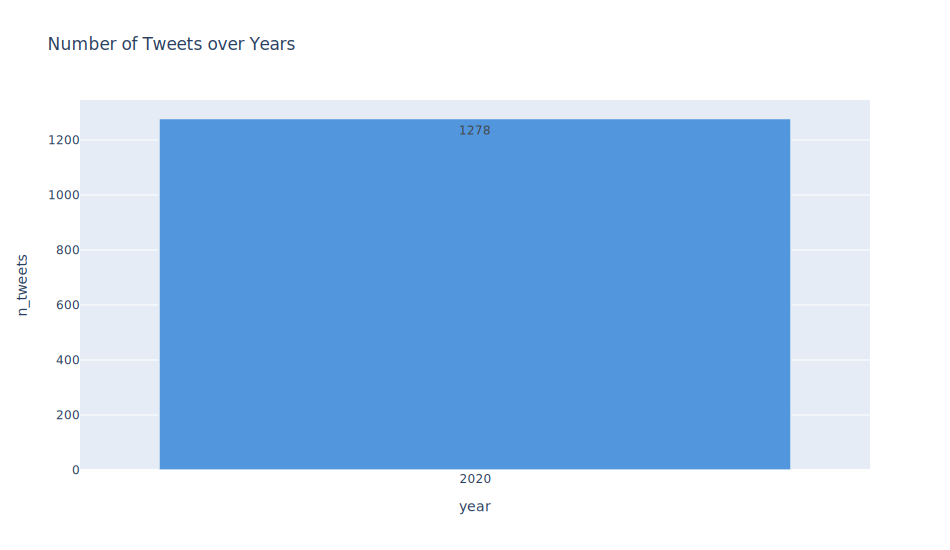

In [55]:
helpers.bar(df_years, "year", "n_tweets", "Number of Tweets over Years", text=0, margin=25000)

<a id='2020_days'></a>
>>### "Aquman Petition" Tweets Created in Each Day of Nov 2020
> <ul>
 <li><a href="#all_years">Total "Aquman Petition" Tweets (in this custer)</a></li>
 <li><a href="#2020_days"><b>Tweets Created in Each Day of Nov 2020</b></a></li>
 </ul>

**NOTE:**
- 2020 Peaks --> Feb, Nov

In [56]:
# helpers.facet_day_month(df_daily_20, "dayofmonth", "n_tweets", facet_on='month', n_col=4, year_str='2020')

In [57]:
df_daily = df_creations.groupby(['date', 'year', 'month', 'dayofmonth'])[['n_tweets', 'by_#accounts', 
                                                                          '#created_accounts']].sum().reset_index()

df_peaks = df_daily.sort_values('n_tweets', ascending=False)
df_peaks.head()

,date,year,month,dayofmonth,n_tweets,by_#accounts,#created_accounts
11,2020-11-13,2020,Nov,13,272,258,1.0
10,2020-11-12,2020,Nov,12,188,155,1.0
12,2020-11-14,2020,Nov,14,90,87,1.0
26,2020-11-28,2020,Nov,28,87,83,0.0
27,2020-11-29,2020,Nov,29,73,72,0.0


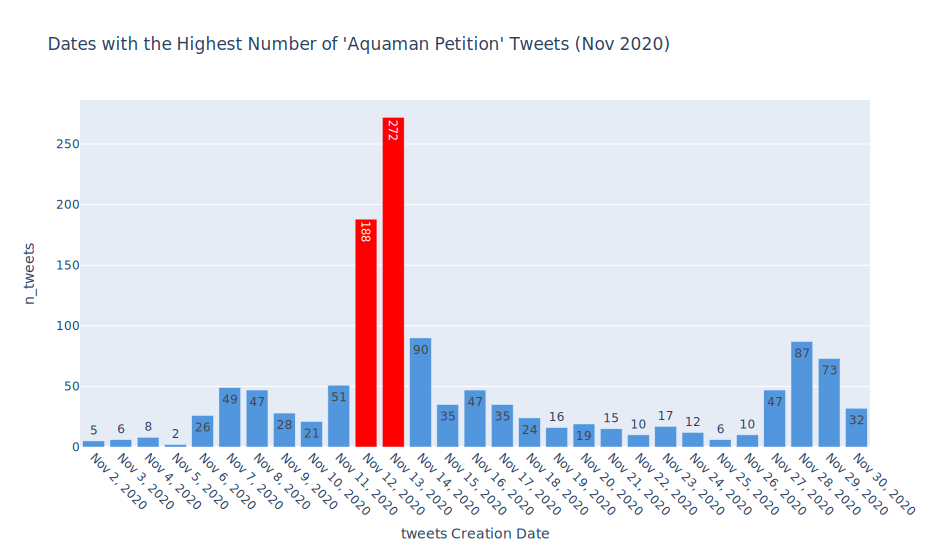

In [58]:
helpers.bar_peaks(df_peaks[['date', 'n_tweets']].head(30), "Dates with the Highest Number of 'Aquaman Petition' Tweets (Nov 2020)", threshold=100)


<a id='top_peaks'></a>
>## "Aquaman Petition" Tweets on Peak Days
> <ul>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks"><b>Tweets on Peak Days</b></a></li> 
 <li><a href="#top_hours">Tweets on Peak Hours</a></li>
 <li><a href="#top_times">Tweets on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
    <li>------------------------------</li>
 <li><a href="#top_Tweeted">Top Tweeted Users</a></li>
 <li><a href="#most_follow">Users with the Most Followers</a></li>
 <li><a href="#most_frnds">Users with the Most Friends</a></li>
 <li><a href="#most_status">Users with the Most Statuses</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#top_retweet">Top Retweeted Tweets</a></li>
 <li><a href="#top_like">Tweets with Most Likes</a></li>
 <li><a href="#top_reply">Tweets with Most Replies</a></li>
 </ul>

<a id='peak_dates'></a>
>>### "Aquaman Petition" Tweets on Peak Dates
> <ul>
 <li><a href="#peak_dates"><b>Tweets on Peak Dates</b></a></li> 
 <li><a href="#users_peak_dates">Users with The Most Contributions on Each Date</a></li>
 </ul>

In [59]:
df_creations.head(1)

,date,year,month,dayofmonth,hour,n_tweets,by_#accounts,#created_accounts
0,2020-11-12,2020,Nov,12,23,30,26,NaN


### Peak Dates

In [60]:
df_peaks.head()

,date,year,month,dayofmonth,n_tweets,by_#accounts,#created_accounts
11,2020-11-13,2020,Nov,13,272,258,1.0
10,2020-11-12,2020,Nov,12,188,155,1.0
12,2020-11-14,2020,Nov,14,90,87,1.0
26,2020-11-28,2020,Nov,28,87,83,0.0
27,2020-11-29,2020,Nov,29,73,72,0.0


>>### 2020-11-13
>>- 272 Tweets with "Aquaman Petition Link"

In [61]:
aquaman_petition[aquaman_petition.date.astype(str) == "2020-11-13"]["text"].value_counts().head()

amber heard slams 'campaign' to remove her from aquaman 2 amid johnny depp drama\nhttps://t.co/arzitxkawm                           2
petition to fire amber heard from 'aquaman 2' hits 1 million https://t.co/uwlh6k8yxq yup ditch the lying bitch 😳                    1
@cellobhane amber heard walking into aquaman 2 set https://t.co/bukxemugvp                                                          1
petition to have amber heard fired from aquaman 2 hits 1m signatures - https://t.co/mum7pzczzq #aquaman2 https://t.co/h5rsjl1nsa    1
amber heard confirms she will return for aquaman 2 https://t.co/y8tdwuzkh6 https://t.co/7hyffvni8i                                  1
Name: text, dtype: int64

In [62]:
aquaman_petition[aquaman_petition.date.astype(str) == "2020-11-13"]["username"].value_counts().head()

todayheadline                                8
Support Johnny Depp ♡ Stream City of Lies    7
digiworldblog                                6
Newszada                                     6
sweet_emmee/Emily♿️♻️                        5
Name: username, dtype: int64

>>### 2020-11-12
>>- 188 Tweets with "Aquaman Petition Link"

In [63]:
aquaman_petition[aquaman_petition.date.astype(str) == "2020-11-12"]["text"].value_counts().head()

fans petition for amber heard to be removed from aquaman 2\n\nhttps://t.co/njdlzvmeve                                           2
@bitchassbowie remove amber heard from aquaman 2\n1,087,262 have signed. let’s get to 1,500,000!\nhttps://t.co/isnbnz7d3z       1
amber heard says she'll return for "aquaman 2": 'i'm excited to get started' https://t.co/y0inlx5meu                            1
amber heard confirms she will return for 'aquaman 2' 🔱\n\n(via @ew) https://t.co/dlzeg1nkwe                                     1
😂😂😂😂😂😂rt @culturecrave: over 1m people have signed a petition to remove amber heard from 'aquaman 2' https://t.co/d826six6it    1
Name: text, dtype: int64

In [64]:
aquaman_petition[aquaman_petition.date.astype(str) == "2020-11-12"]["username"].value_counts().head()

Support Johnny Depp ♡ Stream City of Lies    32
Stephanie Brown                               7
MMG News                                      3
BluRay𝔸ngel                                   2
shalana barbour                               2
Name: username, dtype: int64

<br>

<a id='users_peak_dates'></a>
>>### Users with The Most "Aquaman Petition" Contributions on Each Date
> <ul>
 <li><a href="#peak_dates">Tweets on Peak Dates</a></li> 
 <li><a href="#users_peak_dates"><b>Users with The Most Contributions on Each Date</b></a></li>
 </ul>

In [65]:
# Top 10 Commanted Users
aquaman_petition.username.value_counts().head(10)

Support Johnny Depp ♡ Stream City of Lies    127
Stephanie Brown                               63
Fercho⚡                                       25
Rohan Malviya                                 21
shalana barbour                               14
We Got This Covered                           12
todayheadline                                 11
MMG News                                      11
sweet_emmee/Emily♿️♻️                         10
Rebecca                                       10
Name: username, dtype: int64

In [66]:
df = aquaman_petition.groupby(['date', 'username']).agg({'text':'count'}).reset_index(
).rename(columns={'text':'n_tweets'}).sort_values('n_tweets', ascending=False)

df.head(15)

,date,username,n_tweets
255,2020-11-12,Support Johnny Depp ♡ Stream City of Lies,32
620,2020-11-16,Fercho⚡,25
154,2020-11-11,Support Johnny Depp ♡ Stream City of Lies,21
92,2020-11-08,Rohan Malviya,21
493,2020-11-13,todayheadline,8
253,2020-11-12,Stephanie Brown,7
434,2020-11-13,Support Johnny Depp ♡ Stream City of Lies,7
730,2020-11-23,Stephanie Brown,7
678,2020-11-18,Support Johnny Depp ♡ Stream City of Lies,7
403,2020-11-13,Newszada,6


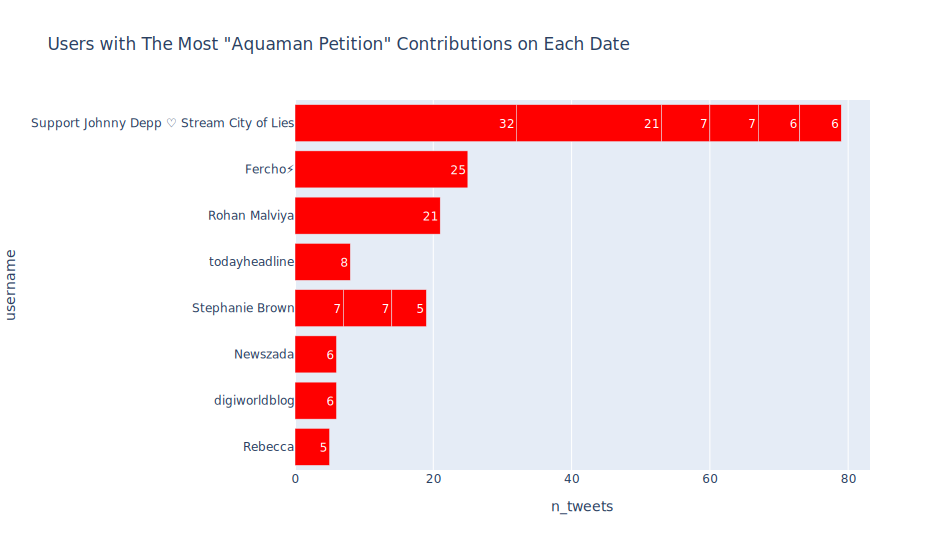

In [67]:
title = 'Users with The Most "Aquaman Petition" Contributions on Each Date'
helpers.barh(df[['username', 'n_tweets']].head(15), title, c='red') # , c=colors

### Support Johnny Depp ♡ Stream City of Lies	(2020-11-12)

In [68]:
mask = (aquaman_petition.date.astype(str)=="2020-11-12") \
& (aquaman_petition.username=="Support Johnny Depp ♡ Stream City of Lies")
support_johnny = aquaman_petition[mask]
support_johnny.text.value_counts()

petition to remove amber heard from aquaman 2 has over 900k signatures #justiceforjohnnydepp  https://t.co/es5zjnp9zf                                                                                                                                                                 1
petition demanding johnny depp's return as jack sparrow nears 300,000 #justiceforjohnnydepp  https://t.co/l7fidzvv3x                                                                                                                                                                  1
@comicbooknow remove amber heard from aquaman 2\n#boycottaquaman2 #boycottwarnerbros #fireamberheard #amberheardisanabuser https://t.co/isnbnz7d3z                                                                                                                                    1
@comicbook remove amber heard from aquaman 2\n#boycottaquaman2 #boycottwarnerbros #fireamberheard #amberheardisanabuser https://t.co/isnbnz7d3z                 

In [69]:
counts_per_hr = support_johnny.groupby('hour').size().reset_index(name='n_tweets')
counts_per_hr.head()

,hour,n_tweets
0,0,1
1,1,1
2,2,1
3,15,2
4,17,9


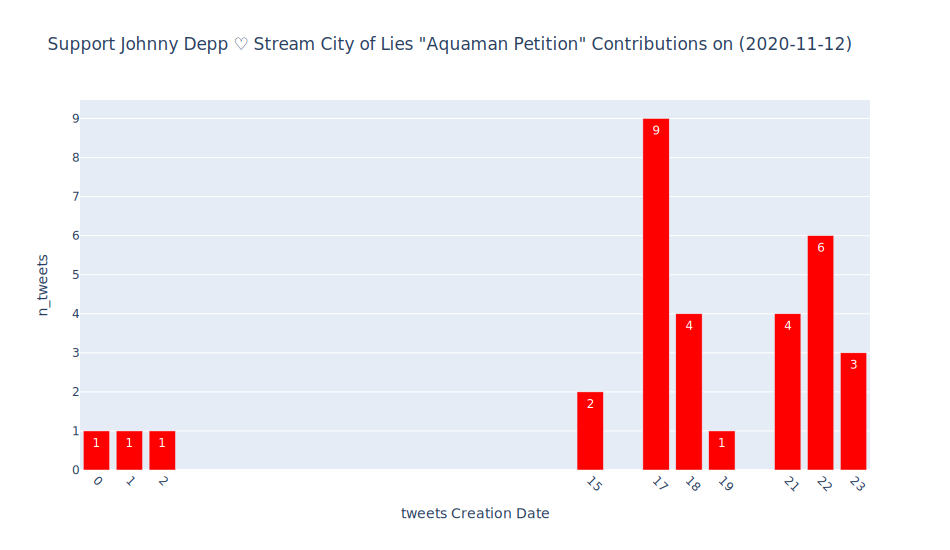

In [70]:
title = 'Support Johnny Depp ♡ Stream City of Lies "Aquaman Petition" Contributions on (2020-11-12)'
helpers.bar_peaks(counts_per_hr, title, threshold=0) 

---

<a id='top_hours'></a>
>## "Aquaman Petition" Tweets on Peak Hours
> <ul>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peak Days</a></li> 
 <li><a href="#top_hours"><b>Tweets on Peak Hours</b></a></li>
 <li><a href="#top_times">Tweets on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
    <li>------------------------------</li>
 <li><a href="#top_Tweeted">Top Tweeted Users</a></li>
 <li><a href="#most_follow">Users with the Most Followers</a></li>
 <li><a href="#most_frnds">Users with the Most Friends</a></li>
 <li><a href="#most_status">Users with the Most Statuses</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#top_retweet">Top Retweeted Tweets</a></li>
 <li><a href="#top_like">Tweets with Most Likes</a></li>
 <li><a href="#top_reply">Tweets with Most Replies</a></li>
 </ul>

In [71]:
aquaman_petition.head(1)

,user_url,n_followers,n_statuses,created_at,text,user_created_at,user_screen_name,is_verified,profile_banner_url,user_location,n_friends,username,lang,profile_image_url,user_id,tweet_id,user_description,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_count
683,None,2408,80366,2020-11-02 15:33:10,dc entertainment: remove amber heard from aqua...,2009-11-07 10:15:40,bsbfan558,False,https://pbs.twimg.com/profile_banners/88158868...,🇺🇸🏴‍☠️#JusticeForJohnnyDepp,4597,shalana barbour,en,http://pbs.twimg.com/profile_images/1380093529...,88158868,1323287041493274624,"love wrestling (WWE) bsb, john cena and watchi...",2020-11-02,2020,Nov,2,15,4013 days 05:17:30,4013,05:17:30,0.0,0.0,0.0,0.0,0.0


In [72]:
df_creations.head(1)

,date,year,month,dayofmonth,hour,n_tweets,by_#accounts,#created_accounts
0,2020-11-12,2020,Nov,12,23,30,26,NaN


In [73]:
df_peak_hrs = df_creations.groupby(['date', 'hour'])[['n_tweets','by_#accounts']].sum().reset_index(
).rename(columns={'text':'n_tweets'}).sort_values('n_tweets', ascending=False)

df_peak_hrs.head(15)

,date,hour,n_tweets,by_#accounts
128,2020-11-12,23,30,26
127,2020-11-12,22,27,20
197,2020-11-16,2,26,2
142,2020-11-13,13,23,22
49,2020-11-08,2,21,1
143,2020-11-13,14,20,18
141,2020-11-13,12,18,17
129,2020-11-13,0,18,18
122,2020-11-12,17,16,7
144,2020-11-13,15,15,14


### Users with The Most Tweets on the same hour

In [74]:
df = aquaman_petition.groupby(['date', 'hour', 'username']).agg({'text':'count'}).reset_index(
).rename(columns={'text':'n_tweets'}).sort_values('n_tweets', ascending=False)

print(df.shape)
df.head(15)

(1123, 4)


,date,hour,username,n_tweets
729,2020-11-16,2,Fercho⚡,25
94,2020-11-08,2,Rohan Malviya,21
270,2020-11-12,17,Support Johnny Depp ♡ Stream City of Lies,9
176,2020-11-11,17,Support Johnny Depp ♡ Stream City of Lies,7
168,2020-11-11,13,Support Johnny Depp ♡ Stream City of Lies,6
317,2020-11-12,22,Support Johnny Depp ♡ Stream City of Lies,6
858,2020-11-23,3,Stephanie Brown,5
278,2020-11-12,18,Support Johnny Depp ♡ Stream City of Lies,4
296,2020-11-12,21,Support Johnny Depp ♡ Stream City of Lies,4
111,2020-11-08,23,Stephanie Brown,4


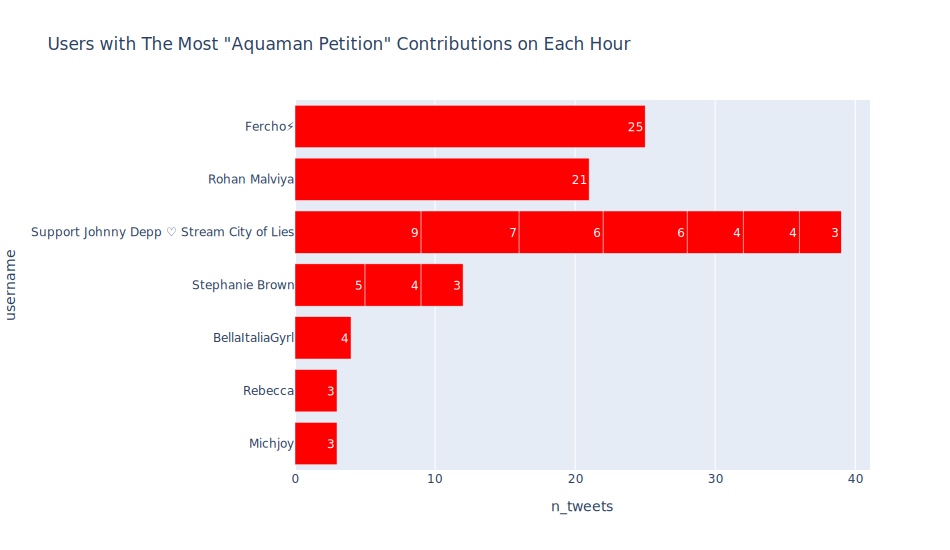

In [75]:
title = 'Users with The Most "Aquaman Petition" Contributions on Each Hour'
helpers.barh(df[['username', 'n_tweets']].head(15), title, c='red') # , c=colors

> ### <font color='red'>Fercho⚡ and Rohan Malviya</font>
>- Both Accounts tweeted more than 20 tweets on the exact same hour (2:00 am), but different days!! 

> ### <font color='red'>Support Johnny Depp ♡ Stream City of Lies</font>
(Who Tweeted more than Once on the same Second!!)
>- Tweeted (7, 9) tweets on (2020-11-11, 2020-11-12) on the exact same hour (17)

### Fercho⚡ (25) "Aquaman Petition" Tweets (2020-11-16) on the same hour (2:00 am)

In [76]:
mask = (aquaman_petition.date.astype(str)=="2020-11-16") \
& (aquaman_petition.username=="Fercho⚡")
Fercho = aquaman_petition[mask]
Fercho.text.value_counts()

@sandradeanne dc entertainment: emilia clarke become mera to replace amber heard in ‘aquaman 2’\nhttps://t.co/uiibtjirmk                                                               2
@rozenyukisharu dc entertainment: emilia clarke become mera to replace amber heard in ‘aquaman 2’\nhttps://t.co/uiibtjirmk                                                             2
#justiceforjohnnydepp\ndc entertainment: emilia clarke become mera to replace amber heard in ‘aquaman 2’\nhttps://t.co/uiibtjirmk                                                      1
@gilliana @thecrownnetflix @netflixuk dc entertainment: emilia clarke become mera to replace amber heard in ‘aquaman 2’\nhttps://t.co/uiibtjirmk                                       1
@lacamaradequito @carlosverareal @patricioalarco2 dc entertainment: emilia clarke become mera to replace amber heard in ‘aquaman 2’\nhttps://t.co/uiibtjirmk                           1
@sc_espn dc entertainment: emilia clarke become mera to replace amber heard

<br>

### Rohan Malviya (21) "Aquaman Petition" Tweets (2020-11-08) on the same hour (2:00 am)

In [77]:
mask = (aquaman_petition.date.astype(str)=="2020-11-08") \
& (aquaman_petition.username=="Rohan Malviya")
Rohan = aquaman_petition[mask]
Rohan.text.value_counts()

@anehansen7 @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                      2
@realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                                  1
@thedeppfan @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                      1
@guyfawkesreveng @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                 1
@x_alyssag @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                       1
@denisseheillen @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                  1
@razcrblade @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                      1
@garciamar5557 @realamberheard https://t.co/pj50xcmocy\n\nspre

---

<a id='top_times'></a>
>## "Aquaman Petition" Tweets on Peak Times
> <ul>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peak Days</a></li> 
 <li><a href="#top_hours">Tweets on Peak Hours</a></li>
 <li><a href="#top_times"><b>Tweets on Peak Times</b></a></li> 
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
    <li>------------------------------</li>
 <li><a href="#top_Tweeted">Top Tweeted Users</a></li>
 <li><a href="#most_follow">Users with the Most Followers</a></li>
 <li><a href="#most_frnds">Users with the Most Friends</a></li>
 <li><a href="#most_status">Users with the Most Statuses</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#top_retweet">Top Retweeted Tweets</a></li>
 <li><a href="#top_like">Tweets with Most Likes</a></li>
 <li><a href="#top_reply">Tweets with Most Replies</a></li>
 </ul>

In [78]:
df_peak_times = aquaman_petition.groupby('created_at').count()['text'].reset_index(name='n_tweets')\
.sort_values('n_tweets', ascending=False)

df_peak_times.head()

,created_at,n_tweets
129,2020-11-08 18:38:57,2
243,2020-11-12 00:28:17,2
434,2020-11-13 00:11:05,2
847,2020-11-16 02:52:38,1
854,2020-11-16 05:29:28,1


In [79]:
df = aquaman_petition.groupby(['created_at', 'username']).agg({'text':'count'}).reset_index(
).rename(columns={'text':'n_tweets'}).sort_values('n_tweets', ascending=False)

df = df[df.n_tweets > 1]

print(f'Unique number of users: {df.username.nunique()}')
print(f'Total number of Tweets: {df.n_tweets.sum()}')
df.head(15)

Unique number of users: 1
Total number of Tweets: 2


,created_at,username,n_tweets
129,2020-11-08 18:38:57,Support Johnny Depp ♡ Stream City of Lies,2


>### <font color='red'>One User Tweeted more than Once on the same Second!!</font>

In [80]:
aquaman_petition.duplicated().sum()

0

In [81]:
aquaman_petition[aquaman_petition.created_at.astype(str) == "2020-11-08 18:38:57"]

,user_url,n_followers,n_statuses,created_at,text,user_created_at,user_screen_name,is_verified,profile_banner_url,user_location,n_friends,username,lang,profile_image_url,user_id,tweet_id,user_description,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_count
2422,https://t.co/0rDo6do7uU,15612,203833,2020-11-08 18:38:57,remove amber heard from aquaman 2\nhttps://t.c...,2015-12-23 23:22:52,MyGrindelwald,False,https://pbs.twimg.com/profile_banners/45832812...,Flanders,273,Support Johnny Depp ♡ Stream City of Lies,en,http://pbs.twimg.com/profile_images/1368268947...,4583281223,1325508122983718915,♡ Depphead\n♡ @hollywoodvamps\n♡ @minamatafilm...,2020-11-08,2020,Nov,8,18,1781 days 19:16:05,1781,19:16:05,4.0,1.0,29.0,2.0,6.0
2423,https://t.co/0rDo6do7uU,15612,203833,2020-11-08 18:38:57,petitions to sign to help johnny depp 👑🫂❤️#jus...,2015-12-23 23:22:52,MyGrindelwald,False,https://pbs.twimg.com/profile_banners/45832812...,Flanders,273,Support Johnny Depp ♡ Stream City of Lies,en,http://pbs.twimg.com/profile_images/1368268947...,4583281223,1325508119129190402,♡ Depphead\n♡ @hollywoodvamps\n♡ @minamatafilm...,2020-11-08,2020,Nov,8,18,1781 days 19:16:05,1781,19:16:05,25.0,2.0,104.0,6.0,31.0


In [82]:
aquaman_petition[aquaman_petition.created_at.astype(str) == "2020-11-08 18:38:57"].tweet_id.value_counts()

1325508122983718915    1
1325508119129190402    1
Name: tweet_id, dtype: int64

In [83]:
print('\nIdentical Tweets data except for the created petition link\n')
aquaman_petition[aquaman_petition.created_at.astype(str) == "2020-11-08 18:38:57"].text.value_counts()


Identical Tweets data except for the created petition link



remove amber heard from aquaman 2\nhttps://t.co/isnbnz7d3z                                                                                                                  1
petitions to sign to help johnny depp 👑🫂❤️#justiceforjohnnydepp \n\na thread: \n\nwarner bros, bring johnny depp back as gellert grindelwald!!!\nhttps://t.co/elazu19brk    1
Name: text, dtype: int64

---

<a id='new'></a>
> ## New Created Accounts
> <ul>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peak Days</a></li> 
 <li><a href="#top_hours">Tweets on Peak Hours</a></li>
 <li><a href="#top_times">Tweets on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#new"><b>New Created Accounts</b></a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
    <li>------------------------------</li>
 <li><a href="#top_Tweeted">Top Tweeted Users</a></li>
 <li><a href="#most_follow">Users with the Most Followers</a></li>
 <li><a href="#most_frnds">Users with the Most Friends</a></li>
 <li><a href="#most_status">Users with the Most Statuses</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#top_retweet">Top Retweeted Tweets</a></li>
 <li><a href="#top_like">Tweets with Most Likes</a></li>
 <li><a href="#top_reply">Tweets with Most Replies</a></li>
 </ul>

### Accounts created in oct, nov 2020 and tweeted in this cluster

In [84]:
# Create a Daily creation dataframe for only the accounts created in oct, nov 2020
# and tweeted in this cluster

df_creations_20 = df_creations2[(df_creations2.year==2020)&(df_creations2.month.isin(['Oct','Nov']))].copy()
print(df_creations_20.shape)
df_creations_20.sort_values('#created_accounts', ascending=False).head(10)


(445, 8)


,date,year,month,dayofmonth,hour,n_tweets,by_#accounts,#created_accounts
396,2020-10-31,2020,Oct,31,22,NaN,NaN,2.0
407,2020-10-30,2020,Oct,30,22,NaN,NaN,2.0
42,2020-11-13,2020,Nov,13,9,6.0,5.0,1.0
941,2020-11-03,2020,Nov,3,23,NaN,NaN,1.0
940,2020-11-04,2020,Nov,4,9,NaN,NaN,1.0
939,2020-11-05,2020,Nov,5,18,NaN,NaN,1.0
938,2020-11-05,2020,Nov,5,23,NaN,NaN,1.0
937,2020-11-06,2020,Nov,6,1,NaN,NaN,1.0
936,2020-11-10,2020,Nov,10,6,NaN,NaN,1.0
943,2020-11-03,2020,Nov,3,10,NaN,NaN,1.0


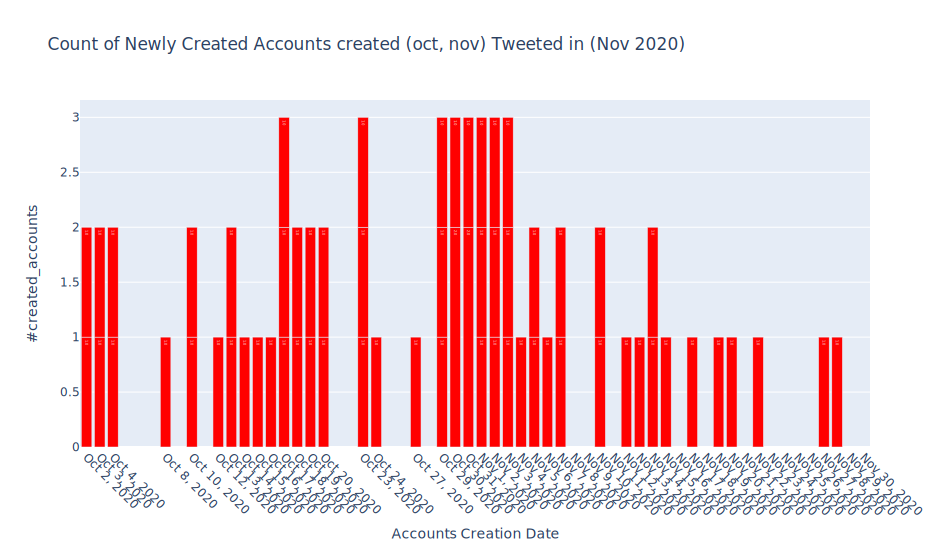

In [85]:
title = "Count of Newly Created Accounts created (oct, nov) Tweeted in (Nov 2020)"
helpers.bar_peaks(df_creations_20[['date', '#created_accounts']], title, threshold=0, xlabel='Accounts Creation Date')


### The tweets created by newly created accounts (oct, nov)

In [86]:
# n --> newly created accounts
tweets_n=tweets[(tweets['user_created_at'].dt.year==2020)&(tweets['user_created_at'].dt.month.isin([10,11]))]
print(tweets_n.shape)
tweets_n.text.value_counts().head()

(204, 30)


johnny depp axed from harry potter franchise after amber heard court case https://t.co/2qzvdyvtuk i guess we have to draw the line somewhere -- how outrageous does your personal life have to be to affect your profession?                                                    3
amber heard flies through air braless amid johnny depp victory https://t.co/nlh4kg8mwa                                                                                                                                                                                          2
with a little over 1.5 hours before the jd vs ngn ruling is made public #johnnydepp is trending.  here’s hoping he gets the justice he deserves and that advocates of dv organisations and movements take time to reflect on their bias towards women. #justiceforjohnnydepp    1
the way that so many little kids adore johnny depp and don’t even know who amber heard is😭😭 \n\nlmfao                                                                             

In [87]:
# Filter on Aquaman petition Links
tmp = tweets_n[tweets_n.text.str.contains('aquaman|petition')]
tmp = tmp[tmp.text.str.contains('http')]
print(tmp.shape)
tmp.text.value_counts().head(20)

(33, 30)


britain : justice nicol needs to be fired! justice for male da survivors! - sign the petition! #justiceforjohnnydepp #amberheardisaliar  https://t.co/hwvy4ftgp4 via @change                                                       1
replace amber heard with bryce dallas howard to play mera in aquaman 2... also give bryce her own star wars movie ❤ https://t.co/xt80nta0ww                                                                                        1
petition to axe amber heard from ‘aquaman 2’ snags upwards 1.5m signatures – deadline https://t.co/by1liugzah i’m sorry she needs to be cut from the movie she doesn’t deserve the role after doing what she did                   1
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/hr1l7amdsk via @change                                                                                                                       1
amber heard thinks johnny depp orchestrated a smear campaign to ruin her aquaman gig

In [88]:
df_peaks_n = tweets_n.groupby('date').size().reset_index(name='n_tweets')

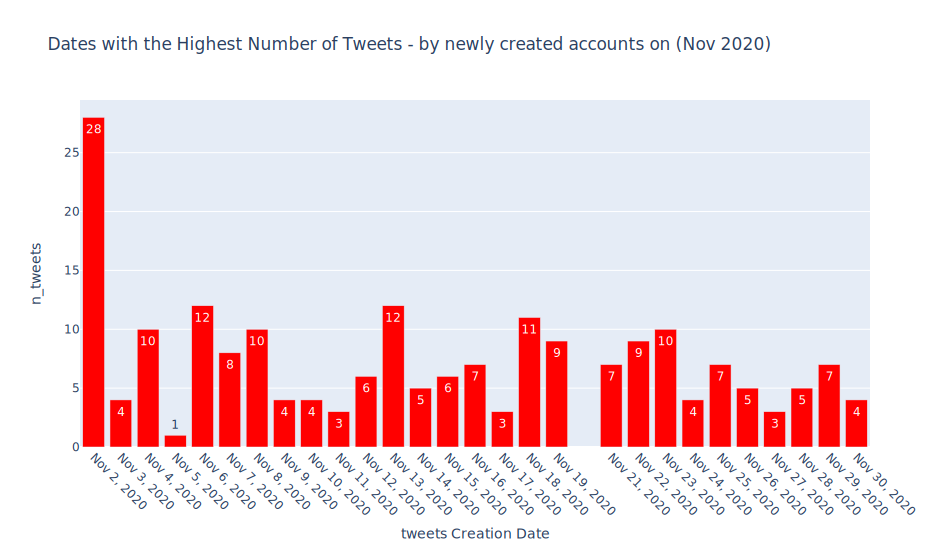

In [89]:
helpers.bar_peaks(df_peaks_n.head(30), "Dates with the Highest Number of Tweets - by newly created accounts on (Nov 2020)", threshold=0)

In [90]:
tweets_n[tweets_n['date'].astype(str) == "2020-11-02"]["text"].value_counts().head(30)

with a little over 1.5 hours before the jd vs ngn ruling is made public #johnnydepp is trending.  here’s hoping he gets the justice he deserves and that advocates of dv organisations and movements take time to reflect on their bias towards women. #justiceforjohnnydepp                 1
deeply disappointing. the poor guy was smeared and had his career ripped to shreds by that abusive shrew, aided by gutter media like this. listen to the widely available recordings yourself. #justiceforjohnnydepp https://t.co/kybuhnovsw                                                 1
@exposedefake #justiceforjohnnydepp #camisadosaopaulo #election2020 #curated_by_bts #bts_be #tomveiga #blastpremier #arsd ana maria braga biden you and i\n\ni'm voting for taylor swift for artist of the year at the #amas\n\nhttps://t.co/v9xvehgfuz                                      1
@pjmgalaxys antes\n\n#justiceforjohnnydepp #camisadosaopaulo #election2020 #curated_by_bts #bts_be #tomveiga #blastpremier #arsd ana maria 

---

<a id='unverified'></a>
> ## Exploring Unverified Accounts
> <ul>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peak Days</a></li> 
 <li><a href="#top_hours">Tweets on Peak Hours</a></li>
 <li><a href="#top_times">Tweets on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified"><b>Unverified Accounts</b></a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li> 
    <li>------------------------------</li>
 <li><a href="#top_Tweeted">Top Tweeted Users</a></li>
 <li><a href="#most_follow">Users with the Most Followers</a></li>
 <li><a href="#most_frnds">Users with the Most Friends</a></li>
 <li><a href="#most_status">Users with the Most Statuses</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#top_retweet">Top Retweeted Tweets</a></li>
 <li><a href="#top_like">Tweets with Most Likes</a></li>
 <li><a href="#top_reply">Tweets with Most Replies</a></li>
 </ul>

In [91]:
tweets.is_verified.value_counts()

False    4809
True      360
Name: is_verified, dtype: int64

In [92]:
aquaman_petition.is_verified.value_counts()

False    1182
True       96
Name: is_verified, dtype: int64

> **NOTE:**
> - Most of the accounts are not verified

In [93]:
df_unverified = aquaman_petition.query(" is_verified == False ")
print(df_unverified.shape)
df_unverified.head()

(1182, 30)


,user_url,n_followers,n_statuses,created_at,text,user_created_at,user_screen_name,is_verified,profile_banner_url,user_location,n_friends,username,lang,profile_image_url,user_id,tweet_id,user_description,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_count
683,None,2408,80366,2020-11-02 15:33:10,dc entertainment: remove amber heard from aqua...,2009-11-07 10:15:40,bsbfan558,False,https://pbs.twimg.com/profile_banners/88158868...,🇺🇸🏴‍☠️#JusticeForJohnnyDepp,4597,shalana barbour,en,http://pbs.twimg.com/profile_images/1380093529...,88158868,1323287041493274624,"love wrestling (WWE) bsb, john cena and watchi...",2020-11-02,2020,Nov,2,15,4013 days 05:17:30,4013,05:17:30,0.0,0.0,0.0,0.0,0.0
913,None,102,37666,2020-11-02 19:27:34,aquaman 2 is set to have amber heard reprise h...,2018-05-25 00:39:50,freefolkbot,False,https://pbs.twimg.com/profile_banners/99981224...,"Puerto Rico, USA",1312,Free Folk Bot,en,http://pbs.twimg.com/profile_images/1120447827...,999812247294791680,1323346029312430087,Bot that posts memes from the best GoT subredd...,2020-11-02,2020,Nov,2,19,892 days 18:47:44,892,18:47:44,0.0,0.0,0.0,0.0,0.0
967,https://t.co/jx9qv6uIqa,3163,18540,2020-11-02 20:53:09,aquaman 2 is set to have amber heard reprise h...,2015-06-14 12:03:01,RedditFreeFolk,False,https://pbs.twimg.com/profile_banners/32451092...,North of the wall,51,RedditFreeFolk,en,http://pbs.twimg.com/profile_images/1121290730...,3245109242,1323367567071846400,WE SHOW SPOILERS. Official subreddit account. ...,2020-11-02,2020,Nov,2,20,1968 days 08:50:08,1968,08:50:08,0.0,1.0,2.0,0.0,0.0
977,None,1999,37410,2020-11-02 21:10:28,we're almost done! i have signed another!\ndc ...,2018-08-10 18:50:13,Stephan76215148,False,https://pbs.twimg.com/profile_banners/10279905...,USA,5000,Stephanie Brown,en,http://pbs.twimg.com/profile_images/1371277785...,1027990519769714688,1323371923548626947,😇🎶🎶😀I Am A #MichaelJackson And #JohnnyDepp Fan...,2020-11-02,2020,Nov,2,21,815 days 02:20:15,815,02:20:15,0.0,0.0,2.0,0.0,0.0
1016,None,699,12440,2020-11-02 22:26:13,dc entertainment: remove amber heard from aqua...,2010-05-02 18:28:07,KPnuts14,False,https://pbs.twimg.com/profile_banners/13947032...,UK,1557,katie power,en,http://pbs.twimg.com/profile_images/1310010092...,139470328,1323390988153425920,OH MY GOD,2020-11-02,2020,Nov,2,22,3837 days 03:58:06,3837,03:58:06,0.0,0.0,0.0,0.0,0.0


In [94]:
df_unverified.username.value_counts().head(15)

Support Johnny Depp ♡ Stream City of Lies    127
Stephanie Brown                               63
Fercho⚡                                       25
Rohan Malviya                                 21
shalana barbour                               14
We Got This Covered                           12
todayheadline                                 11
MMG News                                      11
Rebecca                                       10
sweet_emmee/Emily♿️♻️                         10
Small Screen                                  10
URBANTIAN™                                     9
Newszada                                       8
NewsfeedsMedia                                 8
Andy Vermaut                                   8
Name: username, dtype: int64

In [95]:
df_unverified.text.value_counts().head(60)

fans petition for amber heard to be removed from aquaman 2\n\nhttps://t.co/njdlzvmeve                                                                                                                                                                                                        2
dc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/xaz2gzxauh via @change                                                                                                                                                                                 2
petition to remove amber heard from aquaman 2 crosses million-signature mark https://t.co/rekro8qsjw                                                                                                                                                                                         2
@anehansen7 @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                             

<br>

---

<a id='banned'></a>
>## Deleted or Banned Accounts 
> <ul>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peak Days</a></li> 
 <li><a href="#top_hours">Tweets on Peak Hours</a></li>
 <li><a href="#top_times">Tweets on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned"><b>Deleted or Banned</b></a></li>
 <li><a href="#default">Default Profile Image</a></li>
    <li>------------------------------</li>
 <li><a href="#top_Tweeted">Top Tweeted Users</a></li>
 <li><a href="#most_follow">Users with the Most Followers</a></li>
 <li><a href="#most_frnds">Users with the Most Friends</a></li>
 <li><a href="#most_status">Users with the Most Statuses</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#top_retweet">Top Retweeted Tweets</a></li>
 <li><a href="#top_like">Tweets with Most Likes</a></li>
 <li><a href="#top_reply">Tweets with Most Replies</a></li>
 </ul>

### Check the NaNs in Usernames
The NaNs in username --> either means deleted or banned accounts

In [96]:
helpers.isnull(tweets)

The number of NaNs in user_url: 2041
The number of NaNs in n_followers: 0
The number of NaNs in n_statuses: 0
The number of NaNs in created_at: 0
The number of NaNs in text: 0
The number of NaNs in user_created_at: 0
The number of NaNs in user_screen_name: 0
The number of NaNs in is_verified: 0
The number of NaNs in profile_banner_url: 722
The number of NaNs in user_location: 0
The number of NaNs in n_friends: 0
The number of NaNs in username: 0
The number of NaNs in lang: 0
The number of NaNs in profile_image_url: 0
The number of NaNs in user_id: 0
The number of NaNs in tweet_id: 0
The number of NaNs in user_description: 0
The number of NaNs in date: 0
The number of NaNs in year: 0
The number of NaNs in month: 0
The number of NaNs in dayofmonth: 0
The number of NaNs in hour: 0
The number of NaNs in diff: 0
The number of NaNs in days_diff: 0
The number of NaNs in hours_diff: 0
The number of NaNs in retweet_count: 657
The number of NaNs in reply_count: 657
The number of NaNs in like_cou

In [97]:
tweets[pd.isnull(tweets.username)].head(60)

,user_url,n_followers,n_statuses,created_at,text,user_created_at,user_screen_name,is_verified,profile_banner_url,user_location,n_friends,username,lang,profile_image_url,user_id,tweet_id,user_description,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_count


In [98]:
tweets[pd.isnull(tweets.username)].text.value_counts().head(60)

Series([], Name: text, dtype: int64)

<br>

### Check the NaNs in user_url
The NaNs in user_url --> either means deleted or banned accounts

In [99]:
tweets[pd.isnull(tweets.user_url)].username.value_counts().head(10)

Stephanie Brown                                    130
Pork_ney                                            86
Annapurna 🇬🇧🏴‍☠️                                    40
Rebecca                                             31
ThatUmbrellaGuy (BOW to your PARASOL OVERLORDZ)     29
Laetitia                                            29
shalana barbour                                     28
Fercho⚡                                             25
Rohan Malviya                                       21
Tyree Webster 🇬🇧🇲🇲                                  20
Name: username, dtype: int64

In [100]:
tweets[pd.isnull(tweets.user_url)].user_location.value_counts().head(10)

                               784
USA                            132
United Kingdom                 106
UK                              42
Denmark                         31
Under Da Sea                    29
France                          29
🇺🇸🏴‍☠️#JusticeForJohnnyDepp     28
Earth                           23
Croydon, London                 20
Name: user_location, dtype: int64

In [101]:
print(tweets[pd.isnull(tweets.user_url)].shape)
tweets[pd.isnull(tweets.user_url)].head()

(2041, 30)


,user_url,n_followers,n_statuses,created_at,text,user_created_at,user_screen_name,is_verified,profile_banner_url,user_location,n_friends,username,lang,profile_image_url,user_id,tweet_id,user_description,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_count
3,None,844,369365,2020-11-01 00:47:20,check out life and style magazine khloe kardas...,2013-11-08 00:19:11,ImperialMerchnt,False,None,,2973,ImperialMerchnt,en,http://pbs.twimg.com/profile_images/9785968462...,2181130993,1322701725204172806,,2020-11-01,2020,Nov,1,0,2550 days 00:28:09,2550,00:28:09,0.0,0.0,0.0,0.0,0.0
5,None,2408,80366,2020-11-01 02:53:51,"so my question is, if england just went into l...",2009-11-07 10:15:40,bsbfan558,False,https://pbs.twimg.com/profile_banners/88158868...,🇺🇸🏴‍☠️#JusticeForJohnnyDepp,4597,shalana barbour,en,http://pbs.twimg.com/profile_images/1380093529...,88158868,1322733565205868550,"love wrestling (WWE) bsb, john cena and watchi...",2020-11-01,2020,Nov,1,2,4011 days 16:38:11,4011,16:38:11,0.0,1.0,4.0,0.0,0.0
6,None,271,27225,2020-11-01 04:11:02,amber heard in a black dress – goes to a book ...,2017-05-08 23:47:48,HqCelebpics2k9,False,https://pbs.twimg.com/profile_banners/86172937...,"Chandigarh, India",92,Celebrities Pictures,en,http://pbs.twimg.com/profile_images/1273752974...,861729377007976448,1322752986377080833,"Celebrity Style, Fashion, Clothes, Outfits, Ph...",2020-11-01,2020,Nov,1,4,1272 days 04:23:14,1272,04:23:14,0.0,0.0,0.0,0.0,0.0
8,None,428,17137,2020-11-01 04:58:21,amber heard in a plaid shirt walks her dog in ...,2019-04-05 16:09:28,celebsinbikini8,False,None,,3012,Celebs' Pics,en,http://pbs.twimg.com/profile_images/1266688022...,1114198374495006721,1322764895289565186,,2020-11-01,2020,Nov,1,4,575 days 12:48:53,575,12:48:53,NaN,NaN,NaN,NaN,NaN
9,None,0,6878,2020-11-01 05:14:20,thatumbrellaguy flagged after triggering amber...,2020-02-13 14:33:12,RajaUlat,False,None,,17,Raja-Ulat #SupportHorikoshi,en,http://abs.twimg.com/sticky/default_profile_im...,1227963910021476352,1322768919657000960,I like anime and manga and I hate woke/cancel ...,2020-11-01,2020,Nov,1,5,261 days 14:41:08,261,14:41:08,0.0,0.0,0.0,0.0,0.0


In [102]:
tweets[pd.isnull(tweets.user_url)].text.value_counts().head(60)

amber heard in a plaid shirt walks her dog in los feliz 10/25/2020 https://t.co/4u3lx1pe2b                                                                                                                                                                                                                                         4
this cannot and will not end like this.\n#justiceforjohnnydepp                                                                                                                                                                                                                                                                     4
amber heard in a black tee stops at gelson&amp;#8217;s to gets some grocery shopping done in los feliz 10/31/2020 https://t.co/bepkv37ekw                                                                                                                                                                                          4
@wbpictures @hbomax warne

<br>

---

<a id='default'></a>
>## Accounts with Default Profile Image
> <ul>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peak Days</a></li> 
 <li><a href="#top_hours">Tweets on Peak Hours</a></li>
 <li><a href="#top_times">Tweets on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
    <li><a href="#default"><b>Default Profile Image</b></a></li>
    <li>------------------------------</li>
 <li><a href="#top_Tweeted">Top Tweeted Users</a></li>
 <li><a href="#most_follow">Users with the Most Followers</a></li>
 <li><a href="#most_frnds">Users with the Most Friends</a></li>
 <li><a href="#most_status">Users with the Most Statuses</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#top_retweet">Top Retweeted Tweets</a></li>
 <li><a href="#top_like">Tweets with Most Likes</a></li>
 <li><a href="#top_reply">Tweets with Most Replies</a></li>
 </ul>

### Users with the same profile image (the default image)

In [103]:
users['profile_image_url'].value_counts().head()

http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png    56
http://pbs.twimg.com/profile_images/1365667961319682048/o8_F9CCZ_normal.jpg       1
http://pbs.twimg.com/profile_images/1351930884753137667/OeCdCFkn_normal.jpg       1
http://pbs.twimg.com/profile_images/1346754997741121536/Nfduh7n__normal.jpg       1
http://pbs.twimg.com/profile_images/1273361177381408769/GKqyNXdG_normal.jpg       1
Name: profile_image_url, dtype: int64

In [104]:
image = "http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png"
print(tweets[tweets['profile_image_url'] == image].shape)
tweets[tweets['profile_image_url'] == image].head()

(132, 30)


,user_url,n_followers,n_statuses,created_at,text,user_created_at,user_screen_name,is_verified,profile_banner_url,user_location,n_friends,username,lang,profile_image_url,user_id,tweet_id,user_description,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_count
9,None,0,6878,2020-11-01 05:14:20,thatumbrellaguy flagged after triggering amber...,2020-02-13 14:33:12,RajaUlat,False,None,,17,Raja-Ulat #SupportHorikoshi,en,http://abs.twimg.com/sticky/default_profile_im...,1227963910021476352,1322768919657000960,I like anime and manga and I hate woke/cancel ...,2020-11-01,2020,Nov,1,5,261 days 14:41:08,261,14:41:08,0.0,0.0,0.0,0.0,0.0
106,None,53,31207,2020-11-02 10:15:03,hollywood star loses bitter high court libel t...,2017-01-31 16:24:16,DM_breakingnews,False,None,,21,Daily Mail Breaking,en,http://abs.twimg.com/sticky/default_profile_im...,826466136644521986,1323206983999197185,,2020-11-02,2020,Nov,2,10,1370 days 17:50:47,1370,17:50:47,NaN,NaN,NaN,NaN,NaN
180,None,37,17163,2020-11-02 10:38:42,you expect no different in feminist britain. t...,2013-11-21 09:44:21,trevfromtheyard,False,None,,295,trevor harris,en,http://abs.twimg.com/sticky/default_profile_im...,2189697473,1323212935246815232,,2020-11-02,2020,Nov,2,10,2538 days 00:54:21,2538,00:54:21,0.0,0.0,0.0,0.0,0.0
196,None,45,38132,2020-11-02 10:45:45,johnny depp beat ex amber heard 12 times\nhttp...,2012-05-23 22:43:30,MrMichjoy,False,None,,113,Michjoy,en,http://abs.twimg.com/sticky/default_profile_im...,588717249,1323214708120440833,https://t.co/SoSTYTZzmc,2020-11-02,2020,Nov,2,10,3084 days 12:02:15,3084,12:02:15,0.0,0.0,0.0,0.0,0.0
200,None,45,38132,2020-11-02 10:48:19,@romulholland @lisette_morelos @fatimatorre @b...,2012-05-23 22:43:30,MrMichjoy,False,None,,113,Michjoy,en,http://abs.twimg.com/sticky/default_profile_im...,588717249,1323215353850331144,https://t.co/SoSTYTZzmc,2020-11-02,2020,Nov,2,10,3084 days 12:04:49,3084,12:04:49,0.0,0.0,0.0,0.0,0.0


In [105]:
tweets[tweets['profile_image_url'] == image].username.value_counts().head(10)

Rebecca                        31
Rohan Malviya                  21
Michjoy                         9
Raja-Ulat #SupportHorikoshi     7
A.k                             4
Daily Mail Breaking             3
Michèle Haudebourg              2
PETER HUANG                     2
ALAN EDWARDS                    2
Chris Rice                      2
Name: username, dtype: int64

In [106]:
tweets[tweets['profile_image_url'] == image].user_location.value_counts().head(10)

                        84
Denmark                 31
Anstruther, Scotland     2
Kolkata, India           2
Los Angeles, CA          2
Martinez, GA             1
Dorset Uk                1
manukau, auckland        1
Here                     1
Canada                   1
Name: user_location, dtype: int64

In [107]:
tweets[tweets['profile_image_url'] == image].text.value_counts().head(60)

amber heard flies through air braless amid johnny depp victory https://t.co/nlh4kg8mwa                                                                                                                                                                                                      2
just commented on @thejournal_ie: johnny depp resigns from fantastic beasts after ruling he assaulted amber heard - https://t.co/vy5thkst6u                                                                                                                                                 2
@anehansen7 @realamberheard https://t.co/pj50xcmocy\n\nspread this petition to fire amber heard from aquaman 2                                                                                                                                                                              2
amber heard confirms role in %27aquaman 2,%27 criticizes %27paid campaigns%27 to remove her from ... https://t.co/kmu0fagysv via @yahoonews ❤❤

---

<a id='top_Tweeted'></a>
>## "Aquaman Petition" Top Tweeted Users (In Cluster 1 - Nov)
> <ul>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peak Days</a></li> 
 <li><a href="#top_hours">Tweets on Peak Hours</a></li>
 <li><a href="#top_times">Tweets on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
    <li>------------------------------</li>
 <li><a href="#top_Tweeted"><b>Top Tweeted Users</b></a></li>
 <li><a href="#most_follow">Users with the Most Followers</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#most_status">Users with the Most Statuses</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#top_retweet">Top Retweeted Tweets</a></li>
 <li><a href="#top_like">Tweets with Most Likes</a></li>
 <li><a href="#top_reply">Tweets with Most Replies</a></li>
 </ul>

In [108]:
df_top_users = (
    aquaman_petition["username"]
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "username", "username": "n_tweets"})
)

In [109]:
df_top_users.head()

,username,n_tweets
0,Support Johnny Depp ♡ Stream City of Lies,127
1,Stephanie Brown,63
2,Fercho⚡,25
3,Rohan Malviya,21
4,shalana barbour,14


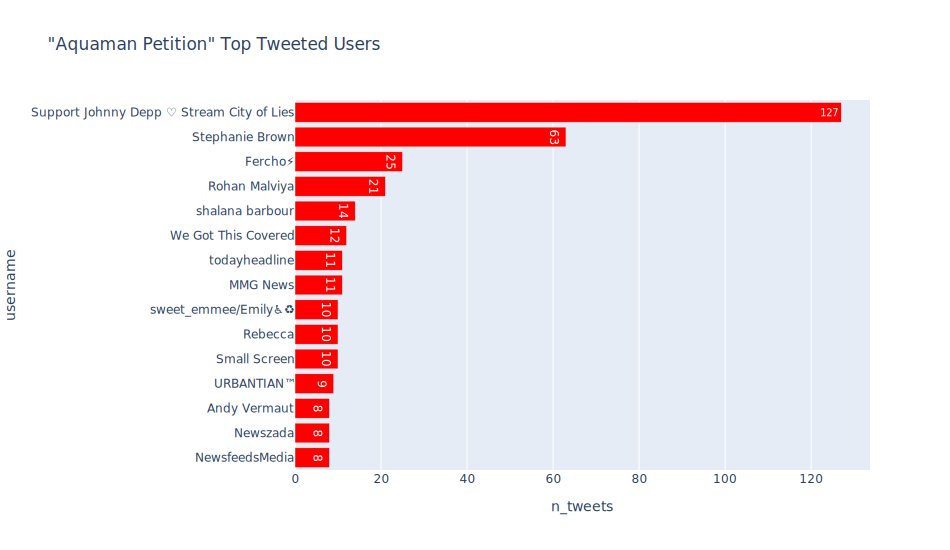

In [110]:
helpers.barh(df_top_users.head(15), '"Aquaman Petition" Top Tweeted Users', c='red') # , c=colors

## Support Johnny Depp ♡ Stream City of Lies

In [111]:
# importlib.reload(helpers)


total number of tweets by "Support Johnny Depp ♡ Stream City of Lies": 892


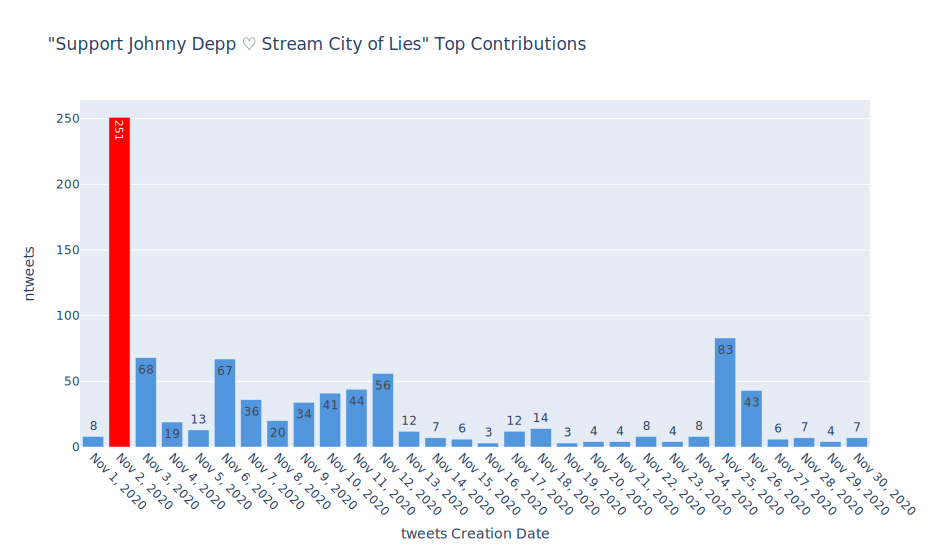

In [112]:
helpers.contr_peaks(tweets, "Support Johnny Depp ♡ Stream City of Lies", n=30, threshold=100)

In [113]:
tweets[tweets.username == "Support Johnny Depp ♡ Stream City of Lies"].text.value_counts().head()

@reuters he'll appeal https://t.co/i8i23dpz7q #justiceforjohnnydepp https://t.co/ga65j0ocuz                   4
@skynews he is going to appeal: https://t.co/6f54rkqzxd\n#justiceforjohnnydepp https://t.co/wior3otubv        3
@independent he is going to appeal: https://t.co/6f54rkqzxd\n#justiceforjohnnydepp https://t.co/wior3otubv    3
@guardian he'll appeal https://t.co/i8i23dpz7q #justiceforjohnnydepp https://t.co/ga65j0ocuz                  3
@reuters he is going to appeal: https://t.co/6f54rkqzxd\n#justiceforjohnnydepp https://t.co/wior3otubv        2
Name: text, dtype: int64

### Support Johnny Depp ♡ Stream City of Lies	(2020-11-02)

In [114]:
# Used the Tweets Data, Since text don't contain 'aquaman' or 'petition'
mask = (tweets.date.astype(str)=="2020-11-02") \
& (tweets.username=="Support Johnny Depp ♡ Stream City of Lies")
support_johnny = tweets[mask]
support_johnny.text.value_counts()

@independent he is going to appeal: https://t.co/6f54rkqzxd\n#justiceforjohnnydepp https://t.co/wior3otubv                                                                         3
@skynews he is going to appeal: https://t.co/6f54rkqzxd\n#justiceforjohnnydepp https://t.co/wior3otubv                                                                             3
@guardian he'll appeal https://t.co/i8i23dpz7q #justiceforjohnnydepp https://t.co/ga65j0ocuz                                                                                       3
@reuters he is going to appeal: https://t.co/6f54rkqzxd\n#justiceforjohnnydepp https://t.co/wior3otubv                                                                             2
@dailymailceleb he is going to appeal: https://t.co/6f54rkqzxd\n#justiceforjohnnydepp https://t.co/wior3otubv                                                                      2
                                                                                               

In [115]:
counts_per_hr = support_johnny.groupby('hour').size().reset_index(name='n_tweets')
counts_per_hr.head()

,hour,n_tweets
0,8,4
1,10,9
2,11,15
3,12,13
4,13,19


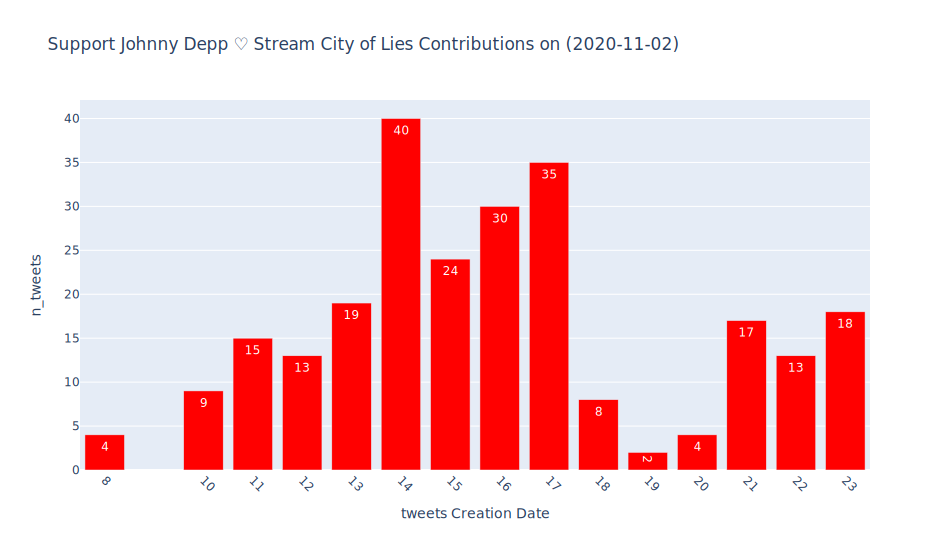

In [116]:
title = 'Support Johnny Depp ♡ Stream City of Lies Contributions on (2020-11-02)'
helpers.bar_peaks(counts_per_hr, title, threshold=0) 

<br>

## Stephanie Brown


total number of tweets by "Stephanie Brown": 130


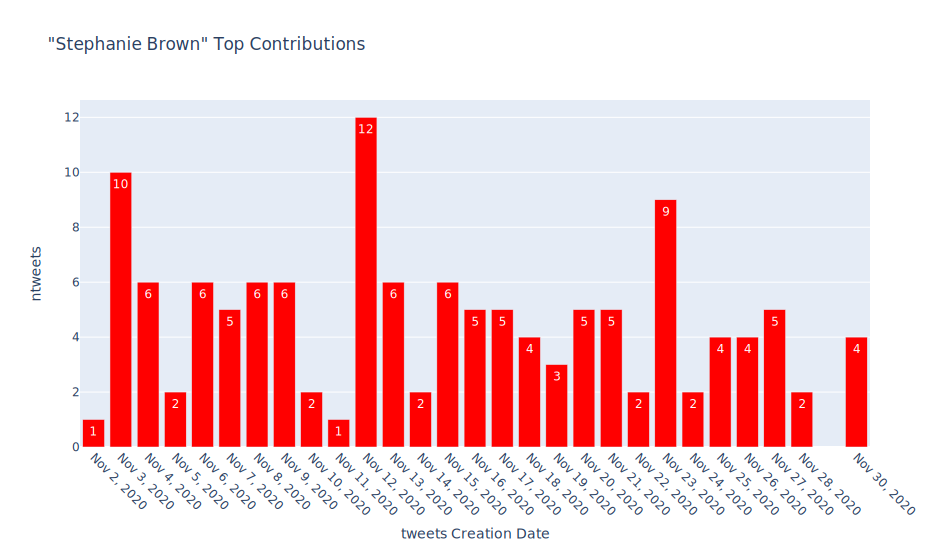

In [117]:
helpers.contr_peaks(tweets, "Stephanie Brown", n=30, threshold=0)

In [118]:
tweets[tweets.username == 'Stephanie Brown'].text.value_counts().head()

we're almost done! i have signed another!\ndc entertainment: remove amber heard from aquaman 2 - sign the petition! https://t.co/jvt6texrkx via @change                                                                                                             1
hey, everyone! look! i found another petition and signed it to get amber heard replaced by emilia clarke as mera! c'mon!!!\ndc comics: replace amber heard with emilia clarke as mera in aquaman 2 - sign the petition! https://t.co/0yv21kf5vj via @change         1
even through tears but with anger at the same time i have found another petition and signed it  to save johnny depp and defeat amber heard!\nwarner brothers: bring justice for actor johnny depp - sign the petition! https://t.co/qt1wrc2ise via @change          1
guess what, my friends? i signed another petition to get #justiceforjohnnydepp!\ndon't give up! pass it on!\nwarner bros. pictures: justice for depp - sign the petition! https://t.co/yqt5hf5pp6 via @change         

### Stephanie Brown	(2020-11-12)

In [119]:
# Used the Tweets Data, Since text don't contain 'aquaman' or 'petition'
mask = (tweets.date.astype(str)=="2020-11-12") \
& (tweets.username=="Stephanie Brown")
Stephanie = tweets[mask]
Stephanie.text.value_counts()

#johnnydeppisinnocent #justiceforjohnnydepp\n"do you believe johnny depp is guilty of the abuse he's been accused of?" my choice was "no" https://t.co/tz2ksd6ko4                                                                                                                                    1
#justiceforjohnnydepp #youcantkeepagoodmandown #weloveyoujohnnydepp\n"do you think johnny depp would make a good ghost rider?" my choice was "yes" https://t.co/qrd452tfbt                                                                                                                           1
what do you guys think?\nsharon osbourne says amber heard 'gave as good as she got' after johnny depp's 'wife beater' libe... https://t.co/dpfedgfueh via @yahoonews                                                                                                                                 1
hey, everybody! i signed another petition to get amber heard fired and locked up in jail!\nunited states supreme co

In [120]:
counts_per_hr = Stephanie.groupby('hour').size().reset_index(name='n_tweets')
counts_per_hr.head()

,hour,n_tweets
0,12,2
1,17,3
2,18,2
3,20,1
4,21,1


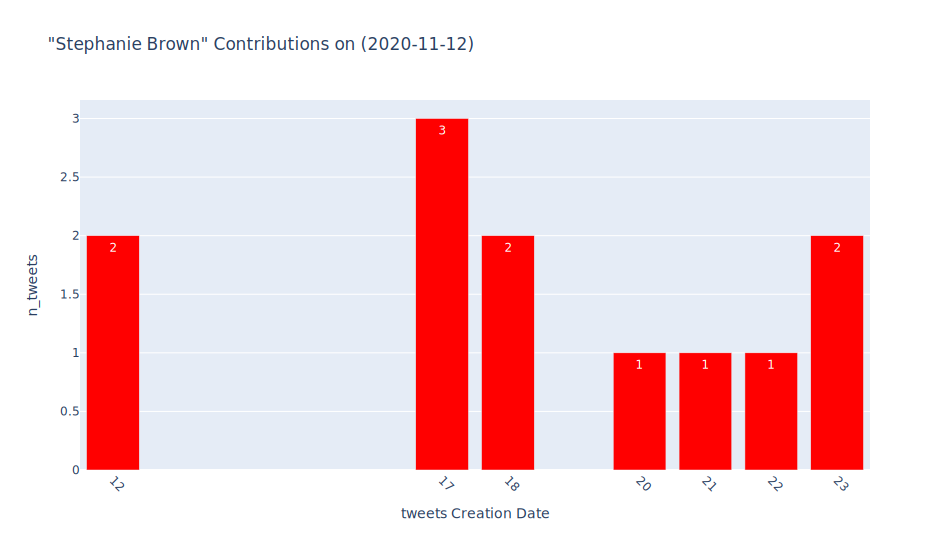

In [121]:
title = '"Stephanie Brown" Contributions on (2020-11-12)'
helpers.bar_peaks(counts_per_hr, title, threshold=0) 

<br>

---

'n_statuses', 'n_followers', 'n_friends'

<a id='most_follow'></a>
>## Users with the Most Followers (In Cluster 1 - Nov)
> <ul>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peak Days</a></li> 
 <li><a href="#top_hours">Tweets on Peak Hours</a></li>
 <li><a href="#top_times">Tweets on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
    <li>------------------------------</li>
 <li><a href="#top_Tweeted">Top Tweeted Users</a></li>
 <li><a href="#most_follow"><b>Users with the Most Followers</b></a></li>
 <li><a href="#most_frnds">Users with the Most Friends</a></li>
 <li><a href="#most_status">Users with the Most Statuses</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#top_retweet">Top Retweeted Tweets</a></li>
 <li><a href="#top_like">Tweets with Most Likes</a></li>
 <li><a href="#top_reply">Tweets with Most Replies</a></li>
 </ul>

In [122]:
aquaman_petition.head(1)

,user_url,n_followers,n_statuses,created_at,text,user_created_at,user_screen_name,is_verified,profile_banner_url,user_location,n_friends,username,lang,profile_image_url,user_id,tweet_id,user_description,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_count
683,None,2408,80366,2020-11-02 15:33:10,dc entertainment: remove amber heard from aqua...,2009-11-07 10:15:40,bsbfan558,False,https://pbs.twimg.com/profile_banners/88158868...,🇺🇸🏴‍☠️#JusticeForJohnnyDepp,4597,shalana barbour,en,http://pbs.twimg.com/profile_images/1380093529...,88158868,1323287041493274624,"love wrestling (WWE) bsb, john cena and watchi...",2020-11-02,2020,Nov,2,15,4013 days 05:17:30,4013,05:17:30,0.0,0.0,0.0,0.0,0.0


In [123]:
df_nfollow = aquaman_petition.groupby(['username']).agg({'text':'count', 'n_statuses': 'max', 'n_friends': 'max', 
                                                         'n_followers': 'max'}).reset_index(
).rename(columns={'text':'n_tweets'}).sort_values('n_followers', ascending=False)

df_nfollow.head(15)

,username,n_tweets,n_statuses,n_friends,n_followers
391,People,1,335815,1722,7658234
148,Entertainment Weekly,1,268488,6282,6557020
506,The Independent,4,1107950,671,3550010
510,The Times,1,226125,778,1536551
175,GamesRadar+,1,103933,759,1051671
116,Deadline Hollywood,2,171040,125126,960957
363,Newsmax,1,111222,568,868009
246,JustJared.com,1,230452,2945,735583
555,Yahoo Entertainment,1,84417,1392,623066
294,Manchester News MEN,1,272127,1413,594978


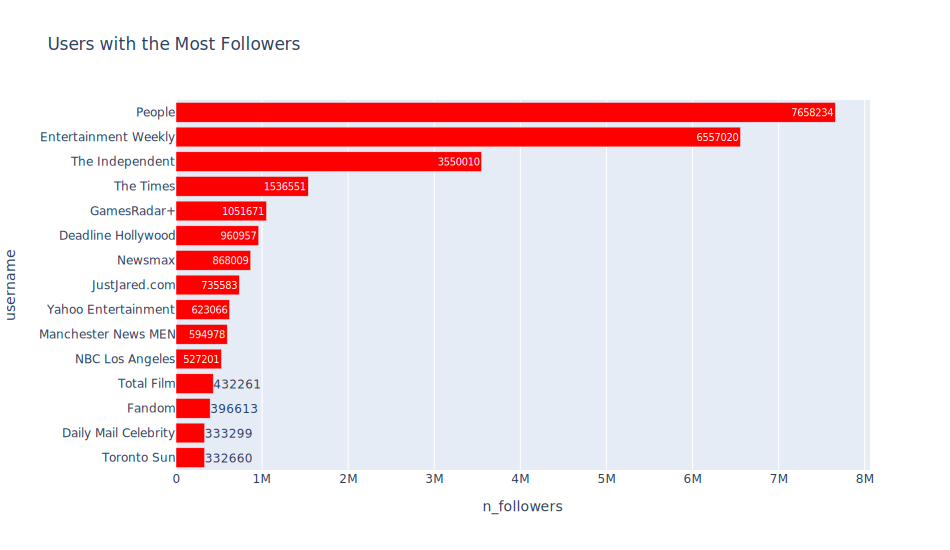

In [124]:
helpers.barh(df_nfollow[['username', 'n_followers']].head(15), "Users with the Most Followers", c='red') # c=colors

In [125]:
tweets[tweets.username == 'People'].text.value_counts().head()

ladies of riverdale dress up in vancouver, plus heidi klum, amber heard and more​ https://t.co/v8h7acxklo                  1
amber heard's lawyer says johnny depp's defeat in 'wife beater' libel case is 'not a surprise'​ https://t.co/xtkcfkpifn    1
shawn mendes cruises through miami, plus garrett hedlund, amber heard and more​ https://t.co/4ocsh4d6mp                    1
amber heard shuts down rumors she's being replaced on aquaman 2: 'i'm excited to get started'​ https://t.co/whytdc4att     1
Name: text, dtype: int64


total number of tweets by "People": 4


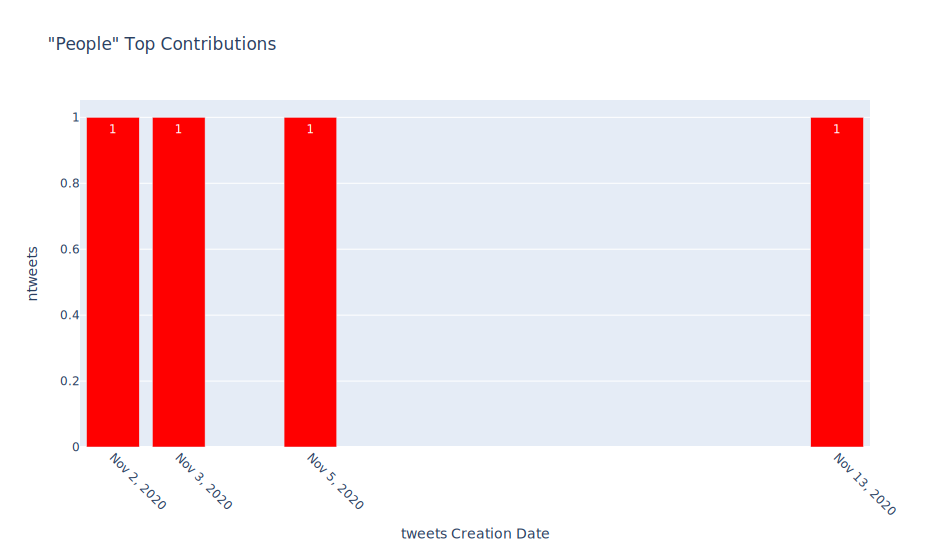

In [126]:
helpers.contr_peaks(tweets, "People", n=30, threshold=0)

In [127]:
tweets[tweets.username == 'Entertainment Weekly'].text.value_counts().head()

there has been a lot of speculation about amber heard's role in 'aquaman 2' in recent months. https://t.co/dhljdhip7c    1
Name: text, dtype: int64


total number of tweets by "Entertainment Weekly": 1


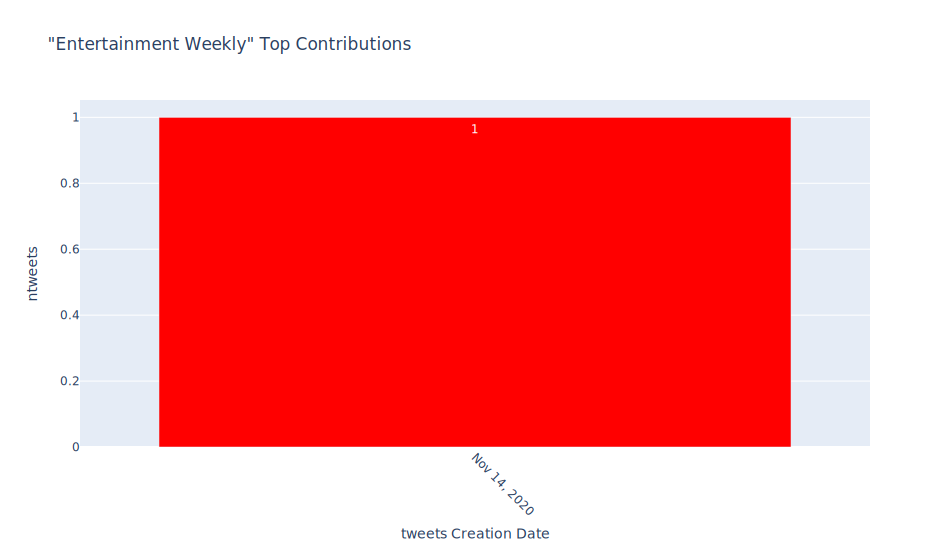

In [128]:
helpers.contr_peaks(tweets, "Entertainment Weekly", n=30, threshold=0)

<br>

'n_statuses', 'n_followers', 'n_friends'

<a id='most_frnds'></a>
>## Users with the Most Friends (In Cluster 1 - Nov)
> <ul>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peak Days</a></li> 
 <li><a href="#top_hours">Tweets on Peak Hours</a></li>
 <li><a href="#top_times">Tweets on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
    <li>------------------------------</li>
 <li><a href="#top_Tweeted">Top Tweeted Users</a></li>
 <li><a href="#most_follow">Users with the Most Followers</a></li>
 <li><a href="#most_frnds"><b>Users with the Most Friends</b></a></li>
 <li><a href="#most_status">Users with the Most Statuses</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#top_retweet">Top Retweeted Tweets</a></li>
 <li><a href="#top_like">Tweets with Most Likes</a></li>
 <li><a href="#top_reply">Tweets with Most Replies</a></li>
 </ul>

In [129]:
df_nfrnds = aquaman_petition.groupby(['username']).agg({'text':'count', 'n_statuses': 'max', 'n_followers': 'max',
                                                         'n_friends': 'max'}).reset_index(
).rename(columns={'text':'n_tweets'}).sort_values('n_friends', ascending=False)

df_nfrnds.head(15)

,username,n_tweets,n_statuses,n_followers,n_friends
116,Deadline Hollywood,2,171040,960957,125126
284,Lucas Wyrsch,1,725057,97068,88893
469,Steven J Gross,1,38898,79606,72196
527,Toxic Agenda,1,394604,62382,60628
176,GeekFeed,1,16360,75510,50656
159,Fandom,2,50128,396613,44656
170,Flickering Myth,2,236852,56116,34906
433,SFX magazine,1,40067,62133,33695
31,Andy Vermaut,8,1086308,30610,26628
419,Richard Pennie,1,70382,21009,23856


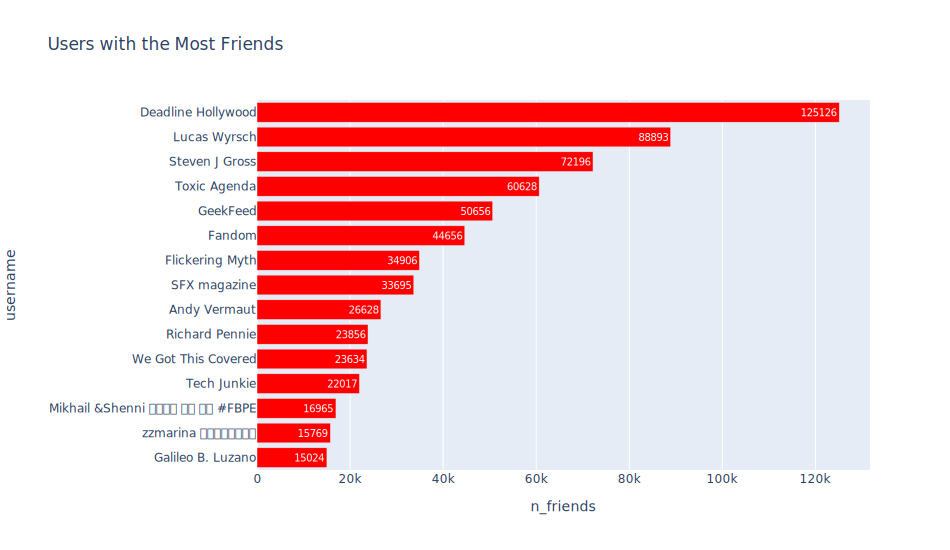

In [130]:
helpers.barh(df_nfrnds[['username', 'n_friends']].head(15), "Users with the Most Friends", c='red')

In [131]:
tweets[tweets.username == 'Deadline Hollywood'].text.value_counts().head()

petition to axe amber heard from ‘aquaman 2’ receives upwards 1.5m signatures following johnny depp’s ‘fantastic beasts’ departure https://t.co/crzmrbxutt                     1
an online petition urging studio personnel to remove amber heard from the upcoming 'aquaman' sequel has received more than 1.5 million signatures.  https://t.co/qc1pkxcrho    1
Name: text, dtype: int64


total number of tweets by "Deadline Hollywood": 2


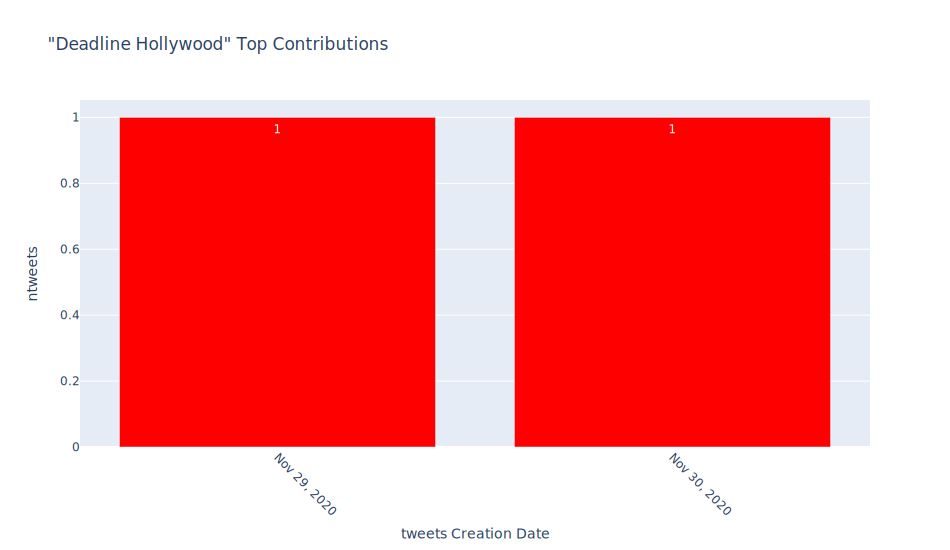

In [132]:
helpers.contr_peaks(tweets, "Deadline Hollywood", n=30, threshold=0)

<a id='most_status'></a>
>## Users with the Most Statuses (In Cluster 1 - Nov)
> <ul>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peak Days</a></li> 
 <li><a href="#top_hours">Tweets on Peak Hours</a></li>
 <li><a href="#top_times">Tweets on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
    <li>------------------------------</li>
 <li><a href="#top_Tweeted">Top Tweeted Users</a></li>
 <li><a href="#most_follow">Users with the Most Followers</a></li>
 <li><a href="#most_frnds">Users with the Most Friends</a></li>
 <li><a href="#most_status"><b>Users with the Most Statuses</b></a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#top_retweet">Top Retweeted Tweets</a></li>
 <li><a href="#top_like">Tweets with Most Likes</a></li>
 <li><a href="#top_reply">Tweets with Most Replies</a></li>
 </ul>

In [133]:
df_nstatus = aquaman_petition.groupby(['username']).agg({'text':'count', 'n_followers': 'max', 'n_friends': 'max',
                                                        'n_statuses': 'max'}).reset_index(
).rename(columns={'text':'n_tweets'}).sort_values('n_statuses', ascending=False)

df_nstatus.head(15)

,username,n_tweets,n_followers,n_friends,n_statuses
405,PulpNews Crime,2,4960,924,3795161
80,Charles Myrick -CEO,3,1383,1860,1644336
561,Zyite.com,4,1745,3666,1612812
300,Martha Leah Nangalama,2,4445,2120,1481055
506,The Independent,4,3550010,671,1107950
31,Andy Vermaut,8,30610,26628,1086308
181,Gina Lawriw,1,9440,7057,1000229
228,Jenkers News (ENG),2,1292,240,925268
121,Dennis Koch,2,7932,8440,790274
284,Lucas Wyrsch,1,97068,88893,725057


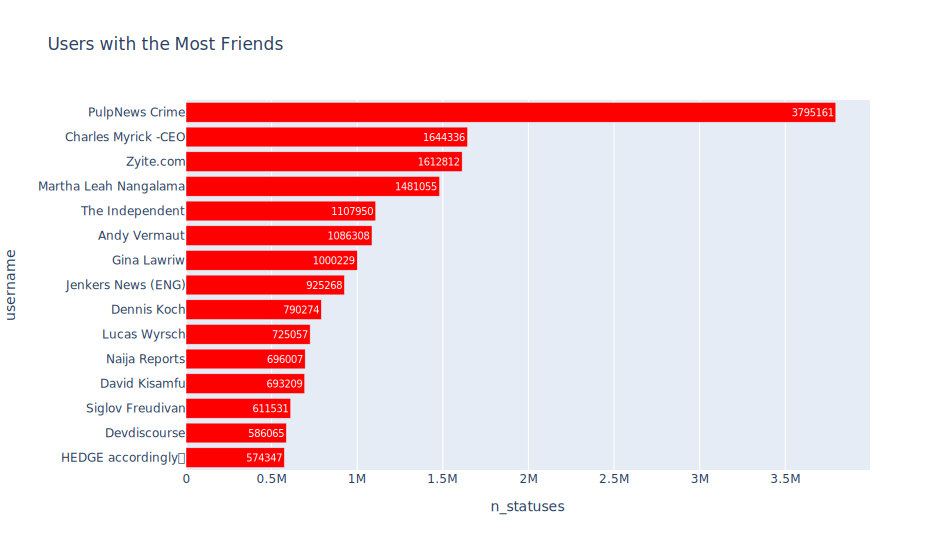

In [134]:
helpers.barh(df_nstatus[['username', 'n_statuses']].head(15), "Users with the Most Friends", c='red')

In [135]:
tweets[tweets.username == 'PulpNews Crime'].text.value_counts().head()

#johnny depp loses 'wife beater' libel #case against uk tabloid over #amber heard allegat - nov 2 @ 7:41 am et [video onsite] https://t.co/poo0ykmvve    1
#amber heard probably didn't poop in #johnny depp's bed, #judge rules - nov 2 @ 12:34 pm et https://t.co/zlb3jvni7i                                      1
'aquaman 2' script to write off #amber heard in future films - report  - nov 19 @ 9:01 am et https://t.co/gqabrdf3bt                                     1
petition to #fire #amber heard from 'aquaman 2' nears 2 million signatures  - nov 24 @ 11:38 pm et https://t.co/69ln2lk3gw                               1
Name: text, dtype: int64


total number of tweets by "PulpNews Crime": 4


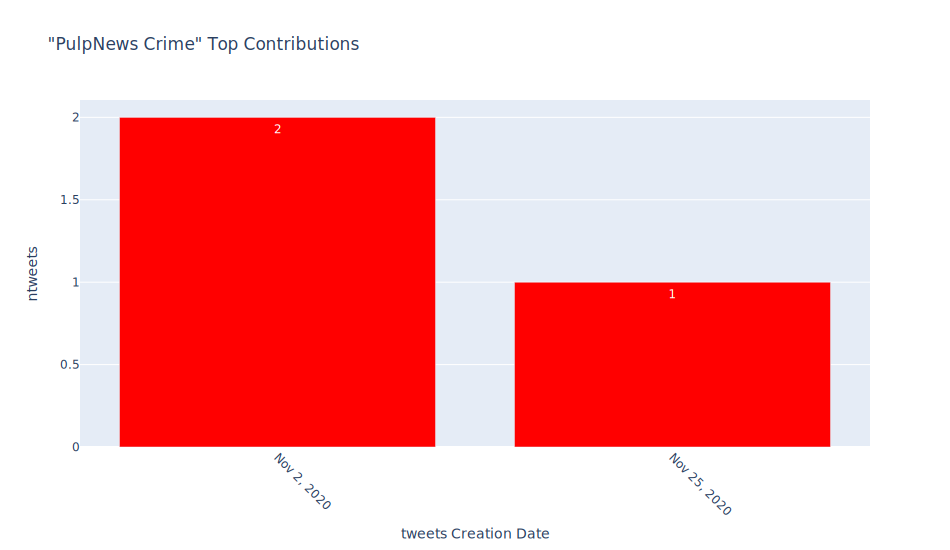

In [136]:
helpers.contr_peaks(tweets, "PulpNews Crime", n=2, threshold=0)

<a id='top_Tweets'></a>
>## Most Repeated Tweets (In Cluster 1 - Nov)
> <ul>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peak Days</a></li> 
 <li><a href="#top_hours">Tweets on Peak Hours</a></li>
 <li><a href="#top_times">Tweets on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
    <li>------------------------------</li>
 <li><a href="#top_Tweeted">Top Tweeted Users</a></li>
 <li><a href="#most_follow">Users with the Most Followers</a></li>
 <li><a href="#most_frnds">Users with the Most Friends</a></li>
 <li><a href="#most_status">Users with the Most Statuses</a></li>
 <li><a href="#top_Tweets"><b>Most Repeated Tweets</b></a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#top_retweet">Top Retweeted Tweets</a></li>
 <li><a href="#top_like">Tweets with Most Likes</a></li>
 <li><a href="#top_reply">Tweets with Most Replies</a></li>
 </ul>

In [137]:
aquaman_petition.text.value_counts().head(30)

@sandradeanne dc entertainment: emilia clarke become mera to replace amber heard in ‘aquaman 2’\nhttps://t.co/uiibtjirmk                                                                                                                                                               2
amber heard slams 'campaign' to remove her from aquaman 2 amid johnny depp drama\nhttps://t.co/arzitxkawm                                                                                                                                                                              2
petition to remove amber heard from aquaman 2 crosses million-signature mark https://t.co/rekro8qsjw                                                                                                                                                                                   2
fans petition for amber heard to be removed from aquaman 2\n\nhttps://t.co/njdlzvmeve                                                                        

<a id='same'></a>
>## Same Text Same Date (In Cluster 1 - Nov)
> <ul>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peak Days</a></li> 
 <li><a href="#top_hours">Tweets on Peak Hours</a></li>
 <li><a href="#top_times">Tweets on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
    <li>------------------------------</li>
 <li><a href="#top_Tweeted">Top Tweeted Users</a></li>
 <li><a href="#most_follow">Users with the Most Followers</a></li>
 <li><a href="#most_frnds">Users with the Most Friends</a></li>
 <li><a href="#most_status">Users with the Most Statuses</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same"><b>Same Text Same Date</b></a></li>
    <li>------------------------------</li>
 <li><a href="#top_retweet">Top Retweeted Tweets</a></li>
 <li><a href="#top_like">Tweets with Most Likes</a></li>
 <li><a href="#top_reply">Tweets with Most Replies</a></li>
 </ul>

In [138]:
aquaman_petition.head(1)

,user_url,n_followers,n_statuses,created_at,text,user_created_at,user_screen_name,is_verified,profile_banner_url,user_location,n_friends,username,lang,profile_image_url,user_id,tweet_id,user_description,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_count
683,None,2408,80366,2020-11-02 15:33:10,dc entertainment: remove amber heard from aqua...,2009-11-07 10:15:40,bsbfan558,False,https://pbs.twimg.com/profile_banners/88158868...,🇺🇸🏴‍☠️#JusticeForJohnnyDepp,4597,shalana barbour,en,http://pbs.twimg.com/profile_images/1380093529...,88158868,1323287041493274624,"love wrestling (WWE) bsb, john cena and watchi...",2020-11-02,2020,Nov,2,15,4013 days 05:17:30,4013,05:17:30,0.0,0.0,0.0,0.0,0.0


In [139]:
# print('\nThe Amplifications in the counts and number of likes on #justiceforjohnnydepp is quite obvious!!')
df_same = aquaman_petition.groupby(["text", "date"]).agg({'tweet_id':'count', 'user_id': 'nunique'}).reset_index()
df_same.rename(columns={'tweet_id': 'n_tweets', 'user_id':'by_#accounts'}, inplace=True) 
df_same.sort_values(["n_tweets", 'date'], ascending=[False, True]).head(15)


,text,date,n_tweets,by_#accounts
675,dc entertainment: remove amber heard from aqua...,2020-11-03,2,1
79,@anehansen7 @realamberheard https://t.co/pj50x...,2020-11-08,2,1
606,dc entertainment: remove amber heard from aqua...,2020-11-11,2,1
719,fans petition for amber heard to be removed fr...,2020-11-12,2,1
419,amber heard slams 'campaign' to remove her fro...,2020-11-13,2,1
1042,petition to remove amber heard from aquaman 2 ...,2020-11-14,2,1
136,@rozenyukisharu dc entertainment: emilia clark...,2020-11-16,2,1
139,@sandradeanne dc entertainment: emilia clarke ...,2020-11-16,2,1
510,aquaman 2 is set to have amber heard reprise h...,2020-11-02,1,1
511,aquaman 2 is set to have amber heard reprise h...,2020-11-02,1,1


---

<a id='top_retweet'></a>
>## Top Retweeted Tweets (In Cluster 1 - Nov)
> <ul>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peak Days</a></li> 
 <li><a href="#top_hours">Tweets on Peak Hours</a></li>
 <li><a href="#top_times">Tweets on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
    <li>------------------------------</li>
 <li><a href="#top_Tweeted">Top Tweeted Users</a></li>
 <li><a href="#most_follow">Users with the Most Followers</a></li>
 <li><a href="#most_frnds">Users with the Most Friends</a></li>
 <li><a href="#most_status">Users with the Most Statuses</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#top_retweet"><b>Top Retweeted Tweets</b></a></li>
 <li><a href="#top_like">Tweets with Most Likes</a></li>
 <li><a href="#top_reply">Tweets with Most Replies</a></li>
 </ul>

In [140]:
top_retweet = aquaman_petition.sort_values('total_count', ascending=False)
top_retweet.head(15)

,user_url,n_followers,n_statuses,created_at,text,user_created_at,user_screen_name,is_verified,profile_banner_url,user_location,n_friends,username,lang,profile_image_url,user_id,tweet_id,user_description,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_count
3187,https://t.co/wVFp54Da1X,396613,50128,2020-11-12 22:48:09,over 1m people have signed a petition to remov...,2007-03-17 03:28:55,getFANDOM,True,https://pbs.twimg.com/profile_banners/1332121/...,"San Francisco, CA",44656,Fandom,en,http://pbs.twimg.com/profile_images/1214705554...,1332121,1327020386253324288,"🎥 🎮 The latest news in Movies, TV, and Video G...",2020-11-12,2020,Nov,12,22,4989 days 19:19:14,4989,19:19:14,2089.0,506.0,13515.0,848.0,2937.0
3106,https://t.co/uHwqKfWCE7,238638,10091,2020-11-12 18:15:35,over 1m people have signed a petition to remov...,2017-11-21 01:43:15,CultureCrave,True,https://pbs.twimg.com/profile_banners/93278645...,"San Francisco, CA",53,Culture Crave 🍿,en,http://pbs.twimg.com/profile_images/9343813552...,932786452739407872,1326951794107281408,"The leading source for movie, TV, video game &...",2020-11-12,2020,Nov,12,18,1087 days 16:32:20,1087,16:32:20,792.0,161.0,6166.0,474.0,1266.0
4707,https://t.co/RZqQSCr84o,7109,31360,2020-11-26 05:30:00,updated boycott list:\n1) fantastic beasts 3\n...,2015-11-27 13:18:08,priceoreason,False,https://pbs.twimg.com/profile_banners/42965208...,,5879,Price of Reason,en,http://pbs.twimg.com/profile_images/1219087222...,4296520829,1331832557416161281,YouTuber / Pop Culture News,2020-11-26,2020,Nov,26,5,1825 days 16:11:52,1825,16:11:52,723.0,97.0,2551.0,121.0,844.0
3138,https://t.co/uHwqKfWCE7,238638,10091,2020-11-12 21:32:16,amber heard confirms she will return for 'aqua...,2017-11-21 01:43:15,CultureCrave,True,https://pbs.twimg.com/profile_banners/93278645...,"San Francisco, CA",53,Culture Crave 🍿,en,http://pbs.twimg.com/profile_images/9343813552...,932786452739407872,1327001290916966400,"The leading source for movie, TV, video game &...",2020-11-12,2020,Nov,12,21,1087 days 19:49:01,1087,19:49:01,52.0,322.0,874.0,779.0,831.0
1814,https://t.co/0rDo6do7uU,15612,203818,2020-11-06 19:44:49,over 500.000 people want abuser amber heard re...,2015-12-23 23:22:52,MyGrindelwald,False,https://pbs.twimg.com/profile_banners/45832812...,Flanders,273,Support Johnny Depp ♡ Stream City of Lies,en,http://pbs.twimg.com/profile_images/1368268947...,4583281223,1324799922412150784,♡ Depphead\n♡ @hollywoodvamps\n♡ @minamatafilm...,2020-11-06,2020,Nov,6,19,1779 days 20:21:57,1779,20:21:57,380.0,21.0,1473.0,107.0,487.0
4998,https://t.co/aA9FtYp0Y8,960957,171040,2020-11-29 04:38:03,petition to axe amber heard from ‘aquaman 2’ r...,2012-05-20 22:10:12,DEADLINE,True,https://pbs.twimg.com/profile_banners/58603265...,"Hollywood, California",125126,Deadline Hollywood,en,http://pbs.twimg.com/profile_images/1268191596...,586032653,1332906646851506176,Hollywood's source for breaking news,2020-11-29,2020,Nov,29,4,3114 days 06:27:51,3114,06:27:51,183.0,82.0,1389.0,82.0,265.0
3174,https://t.co/wVFp54Da1X,396613,50128,2020-11-12 22:24:13,amber heard squashes rumors that wb is replaci...,2007-03-17 03:28:55,getFANDOM,True,https://pbs.twimg.com/profile_banners/1332121/...,"San Francisco, CA",44656,Fandom,en,http://pbs.twimg.com/profile_images/1214705554...,1332121,1327014364138729472,"🎥 🎮 The latest news in Movies, TV, and Video G...",2020-11-12,2020,Nov,12,22,4989 days 18:55:18,4989,18:55:18,71.0,158.0,1084.0,174.0,245.0
3088,https://t.co/6QAHooFXl4,11603,26151,2020-11-12 17:37:56,over 1 million people want amber heard booted ...,2017-03-28 23:18:50,TheBlastNews,True,https://pbs.twimg.com/profile_banners/84686418...,"Los Angeles, CA",707,The Blast,en,http://pbs.twimg.com/profile_images/9207409622...,846864187015888896,1326942319275335696,The new destination for breaking news in the w...,2020-11-12,2020,Nov,12,17,1324 days 18:19:06,1324,18:19:06,124.0,93.0,871.0,104.0,228.0
3513,https

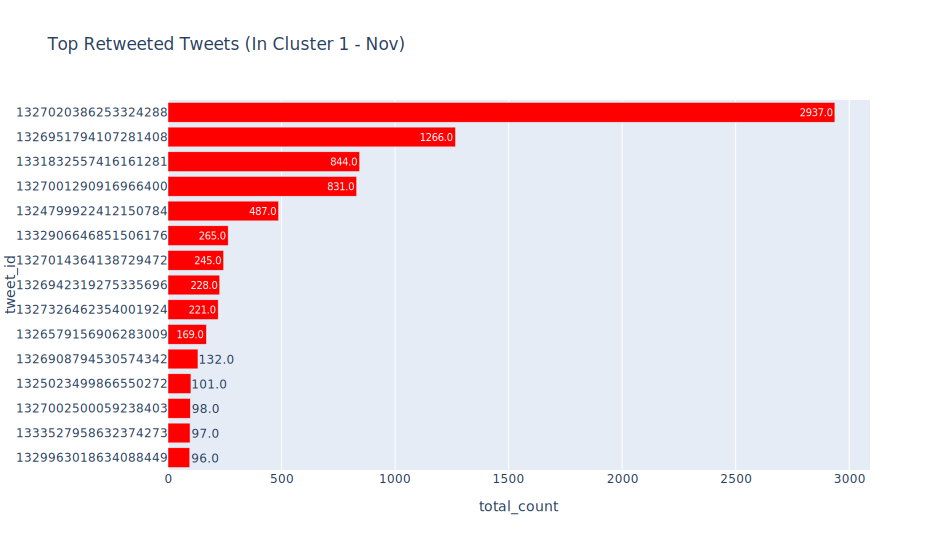

In [141]:
helpers.barh(top_retweet[['tweet_id', 'total_count']].head(15), "Top Retweeted Tweets (In Cluster 1 - Nov)", c='red') # c=colors

In [142]:
top_retweet.username.head(15)

3187                                       Fandom
3106                              Culture Crave 🍿
4707                              Price of Reason
3138                              Culture Crave 🍿
1814    Support Johnny Depp ♡ Stream City of Lies
4998                           Deadline Hollywood
3174                                       Fandom
3088                                    The Blast
3513                                 Andy Signore
2897    Support Johnny Depp ♡ Stream City of Lies
3064                         Comic Book Resources
2130    Support Johnny Depp ♡ Stream City of Lies
3142                              Price of Reason
5156                           Deadline Hollywood
4236                        JT Larson Depp-Mignon
Name: username, dtype: object

In [143]:
top_retweet.text.head(15).value_counts()

over 1m people have signed a petition to remove amber heard from 'aquaman 2' https://t.co/ma06smva6y                                                                                                                                                                                                        1
over 1m people have signed a petition to remove amber heard from 'aquaman 2' https://t.co/yem8gxketd                                                                                                                                                                                                        1
updated boycott list:\n1) fantastic beasts 3\n2) pirates of the caribbean 6\n3) aquaman 2\npass it on!\n#justiceforjohnnydepp https://t.co/4juupvltdh                                                                                                                                                       1
amber heard confirms she will return for 'aquaman 2' 🔱\n\n(via @ew) https://t.co/dlzeg1nkwe   

In [144]:
tweets[tweets.username == 'Fandom'].text.value_counts().head()

amber heard squashes rumors that wb is replacing her in 'aquaman 2' — 'they have no basis in reality'\n\n(via @ew | https://t.co/vrrzyffjun) https://t.co/dlxvaod9ho    1
over 1m people have signed a petition to remove amber heard from 'aquaman 2' https://t.co/ma06smva6y                                                                    1
Name: text, dtype: int64


total number of tweets by "Fandom": 2


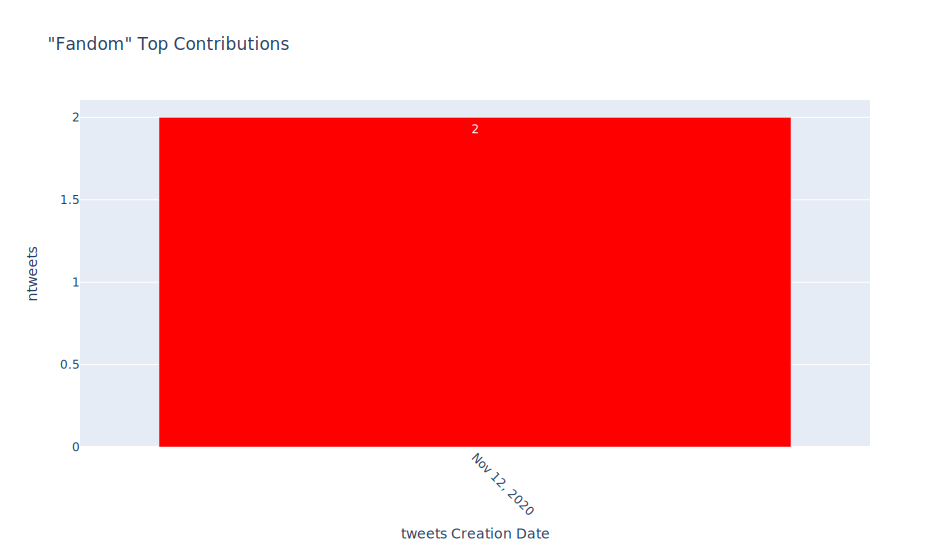

In [145]:
helpers.contr_peaks(tweets, "Fandom", n=30, threshold=0)

In [146]:
tweets[tweets.username == 'Culture Crave 🍿'].text.value_counts().head()

over 1m people have signed a petition to remove amber heard from 'aquaman 2' https://t.co/yem8gxketd    1
amber heard confirms she will return for 'aquaman 2' 🔱\n\n(via @ew) https://t.co/dlzeg1nkwe             1
Name: text, dtype: int64


total number of tweets by "Culture Crave 🍿": 2


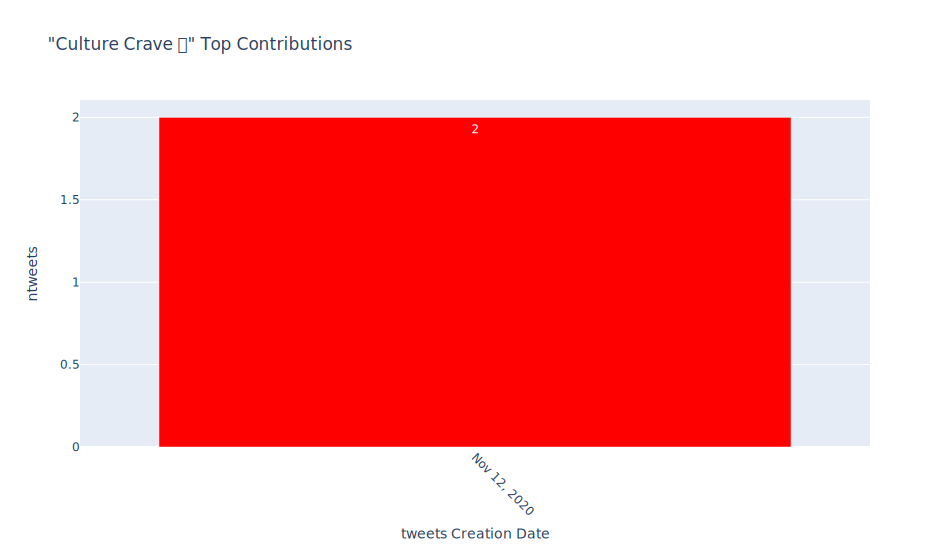

In [147]:
helpers.contr_peaks(tweets, "Culture Crave 🍿", n=30, threshold=0)


total number of tweets by "Price of Reason": 5


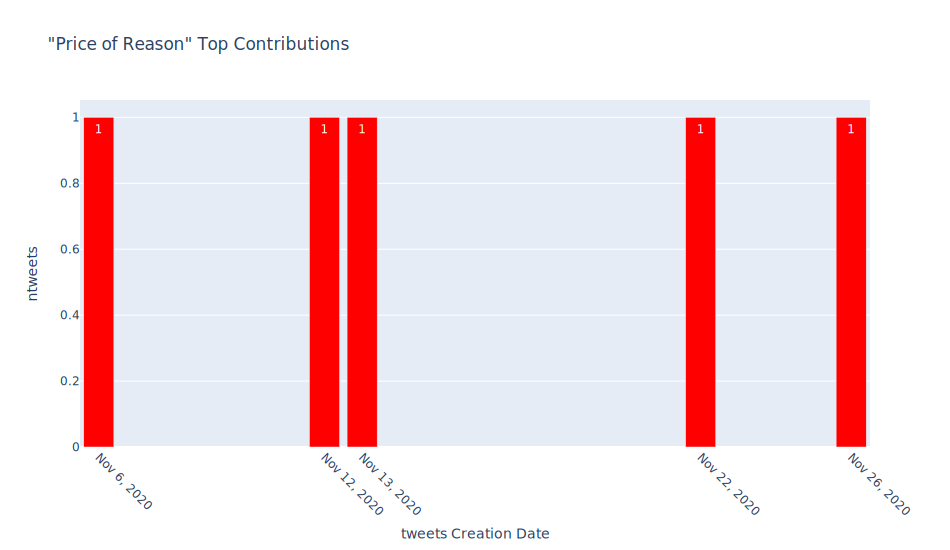

In [148]:
helpers.contr_peaks(tweets, "Price of Reason", n=30, threshold=0)

In [149]:
tweets[tweets.username == 'Price of Reason'].text.value_counts().head()

breaking: johnny depp says he has agreed to "resign" from "fantastic beasts". basically, he was fired by warner bros. but this is the more diplomatic wording to say it. this is bullsh1t! i hope this movie tanks hard at the box office. #justiceforjohnnydepp https://t.co/ide6crl3lb    1
breaking: amber heard says she's 100 percent returning for aquaman 2 and that she's super execited to start filming after she lied and ruined johnny depp's career. (source: @ew )\n#justiceforjohnnydepp https://t.co/ldqqfcabjx                                                           1
@jacxpearl @dancemachine48 i agree. the only one i heard confess to physical violence was her. he's not talking about that here. just a cheap gaslight effort by amber heard pr people.                                                                                                     1
if true, amber heard as sue storm would be such a spit in the face to fantastic four fans. i'd prefer they already bring back jessica alba. he

In [150]:
tweets[tweets.username == 'Support Johnny Depp ♡ Stream City of Lies'].text.value_counts().head()

@reuters he'll appeal https://t.co/i8i23dpz7q #justiceforjohnnydepp https://t.co/ga65j0ocuz                   4
@skynews he is going to appeal: https://t.co/6f54rkqzxd\n#justiceforjohnnydepp https://t.co/wior3otubv        3
@independent he is going to appeal: https://t.co/6f54rkqzxd\n#justiceforjohnnydepp https://t.co/wior3otubv    3
@guardian he'll appeal https://t.co/i8i23dpz7q #justiceforjohnnydepp https://t.co/ga65j0ocuz                  3
@reuters he is going to appeal: https://t.co/6f54rkqzxd\n#justiceforjohnnydepp https://t.co/wior3otubv        2
Name: text, dtype: int64


total number of tweets by "Support Johnny Depp ♡ Stream City of Lies": 892


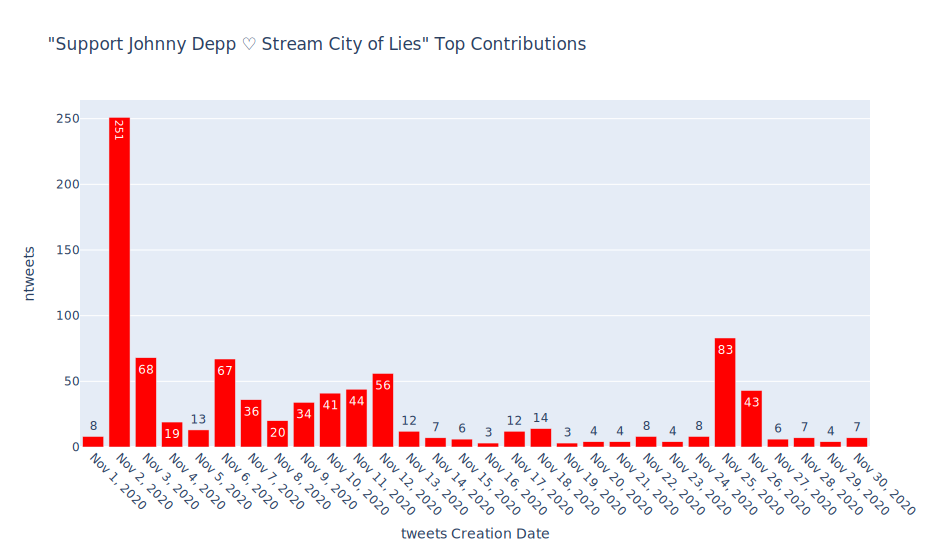

In [151]:
helpers.contr_peaks(tweets, "Support Johnny Depp ♡ Stream City of Lies", n=30, threshold=0)

<br>

---

<a id='top_like'></a>
>## Tweets with Most Likes (In Cluster 1 - Nov)
> <ul>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peak Days</a></li> 
 <li><a href="#top_hours">Tweets on Peak Hours</a></li>
 <li><a href="#top_times">Tweets on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
    <li>------------------------------</li>
 <li><a href="#top_Tweeted">Top Tweeted Users</a></li>
 <li><a href="#most_follow">Users with the Most Followers</a></li>
 <li><a href="#most_frnds">Users with the Most Friends</a></li>
 <li><a href="#most_status">Users with the Most Statuses</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#top_retweet">Top Retweeted Tweets</a></li>
 <li><a href="#top_like"><b>Tweets with Most Likes</b></a></li>
 <li><a href="#top_reply">Tweets with Most Replies</a></li>
 </ul>

In [152]:
top_liked = aquaman_petition.sort_values('like_count', ascending=False)
top_liked.head(15)

,user_url,n_followers,n_statuses,created_at,text,user_created_at,user_screen_name,is_verified,profile_banner_url,user_location,n_friends,username,lang,profile_image_url,user_id,tweet_id,user_description,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_count
3187,https://t.co/wVFp54Da1X,396613,50128,2020-11-12 22:48:09,over 1m people have signed a petition to remov...,2007-03-17 03:28:55,getFANDOM,True,https://pbs.twimg.com/profile_banners/1332121/...,"San Francisco, CA",44656,Fandom,en,http://pbs.twimg.com/profile_images/1214705554...,1332121,1327020386253324288,"🎥 🎮 The latest news in Movies, TV, and Video G...",2020-11-12,2020,Nov,12,22,4989 days 19:19:14,4989,19:19:14,2089.0,506.0,13515.0,848.0,2937.0
3106,https://t.co/uHwqKfWCE7,238638,10091,2020-11-12 18:15:35,over 1m people have signed a petition to remov...,2017-11-21 01:43:15,CultureCrave,True,https://pbs.twimg.com/profile_banners/93278645...,"San Francisco, CA",53,Culture Crave 🍿,en,http://pbs.twimg.com/profile_images/9343813552...,932786452739407872,1326951794107281408,"The leading source for movie, TV, video game &...",2020-11-12,2020,Nov,12,18,1087 days 16:32:20,1087,16:32:20,792.0,161.0,6166.0,474.0,1266.0
4707,https://t.co/RZqQSCr84o,7109,31360,2020-11-26 05:30:00,updated boycott list:\n1) fantastic beasts 3\n...,2015-11-27 13:18:08,priceoreason,False,https://pbs.twimg.com/profile_banners/42965208...,,5879,Price of Reason,en,http://pbs.twimg.com/profile_images/1219087222...,4296520829,1331832557416161281,YouTuber / Pop Culture News,2020-11-26,2020,Nov,26,5,1825 days 16:11:52,1825,16:11:52,723.0,97.0,2551.0,121.0,844.0
1814,https://t.co/0rDo6do7uU,15612,203818,2020-11-06 19:44:49,over 500.000 people want abuser amber heard re...,2015-12-23 23:22:52,MyGrindelwald,False,https://pbs.twimg.com/profile_banners/45832812...,Flanders,273,Support Johnny Depp ♡ Stream City of Lies,en,http://pbs.twimg.com/profile_images/1368268947...,4583281223,1324799922412150784,♡ Depphead\n♡ @hollywoodvamps\n♡ @minamatafilm...,2020-11-06,2020,Nov,6,19,1779 days 20:21:57,1779,20:21:57,380.0,21.0,1473.0,107.0,487.0
4998,https://t.co/aA9FtYp0Y8,960957,171040,2020-11-29 04:38:03,petition to axe amber heard from ‘aquaman 2’ r...,2012-05-20 22:10:12,DEADLINE,True,https://pbs.twimg.com/profile_banners/58603265...,"Hollywood, California",125126,Deadline Hollywood,en,http://pbs.twimg.com/profile_images/1268191596...,586032653,1332906646851506176,Hollywood's source for breaking news,2020-11-29,2020,Nov,29,4,3114 days 06:27:51,3114,06:27:51,183.0,82.0,1389.0,82.0,265.0
3174,https://t.co/wVFp54Da1X,396613,50128,2020-11-12 22:24:13,amber heard squashes rumors that wb is replaci...,2007-03-17 03:28:55,getFANDOM,True,https://pbs.twimg.com/profile_banners/1332121/...,"San Francisco, CA",44656,Fandom,en,http://pbs.twimg.com/profile_images/1214705554...,1332121,1327014364138729472,"🎥 🎮 The latest news in Movies, TV, and Video G...",2020-11-12,2020,Nov,12,22,4989 days 18:55:18,4989,18:55:18,71.0,158.0,1084.0,174.0,245.0
3138,https://t.co/uHwqKfWCE7,238638,10091,2020-11-12 21:32:16,amber heard confirms she will return for 'aqua...,2017-11-21 01:43:15,CultureCrave,True,https://pbs.twimg.com/profile_banners/93278645...,"San Francisco, CA",53,Culture Crave 🍿,en,http://pbs.twimg.com/profile_images/9343813552...,932786452739407872,1327001290916966400,"The leading source for movie, TV, video game &...",2020-11-12,2020,Nov,12,21,1087 days 19:49:01,1087,19:49:01,52.0,322.0,874.0,779.0,831.0
3088,https://t.co/6QAHooFXl4,11603,26151,2020-11-12 17:37:56,over 1 million people want amber heard booted ...,2017-03-28 23:18:50,TheBlastNews,True,https://pbs.twimg.com/profile_banners/84686418...,"Los Angeles, CA",707,The Blast,en,http://pbs.twimg.com/profile_images/9207409622...,846864187015888896,1326942319275335696,The new destination for breaking news in the w...,2020-11-12,2020,Nov,12,17,1324 days 18:19:06,1324,18:19:06,124.0,93.0,871.0,104.0,228.0
3513,https

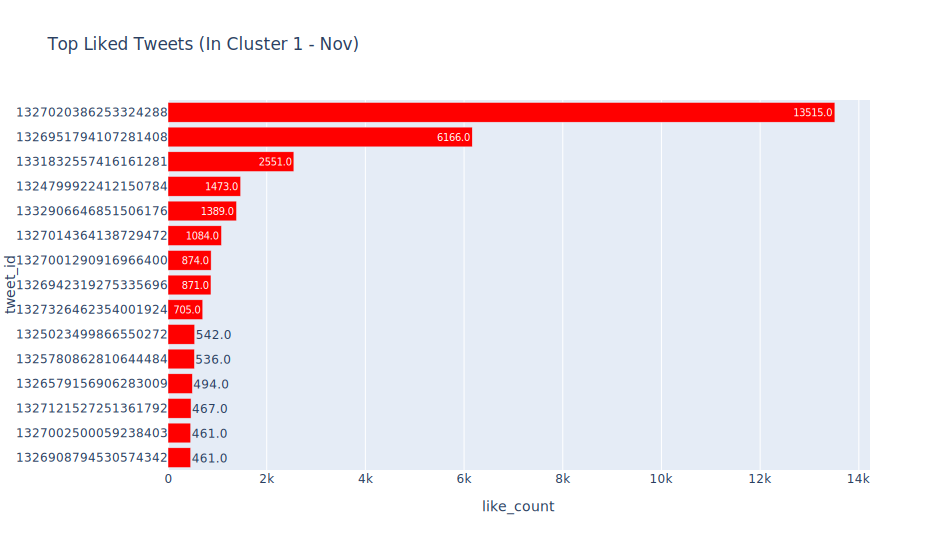

In [153]:
helpers.barh(top_liked[['tweet_id', 'like_count']].head(15), "Top Liked Tweets (In Cluster 1 - Nov)", c='red') # c=colors

In [154]:
top_liked.username.head(15)

3187                                       Fandom
3106                              Culture Crave 🍿
4707                              Price of Reason
1814    Support Johnny Depp ♡ Stream City of Lies
4998                           Deadline Hollywood
3174                                       Fandom
3138                              Culture Crave 🍿
3088                                    The Blast
3513                                 Andy Signore
2130    Support Johnny Depp ♡ Stream City of Lies
2517                      coco🥕(taylor’s version)
2897    Support Johnny Depp ♡ Stream City of Lies
3304                                    The Blast
3142                              Price of Reason
3064                         Comic Book Resources
Name: username, dtype: object

<br>

---

<a id='top_reply'></a>
>## Tweets with Most Replies (In Cluster 1 - Nov)
> <ul>
 <li><a href="#diff">Duration After Account Creation</a></li>
 <li><a href="#over_time">Tweets Created OVER TIME</a></li>
 <li><a href="#top_peaks">Tweets on Peak Days</a></li> 
 <li><a href="#top_hours">Tweets on Peak Hours</a></li>
 <li><a href="#top_times">Tweets on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#new">New Created Accounts</a></li>
 <li><a href="#unverified">Unverified Accounts</a></li>
 <li><a href="#banned">Deleted or Banned</a></li>
 <li><a href="#default">Default Profile Image</a></li>
    <li>------------------------------</li>
 <li><a href="#top_Tweeted">Top Tweeted Users</a></li>
 <li><a href="#most_follow">Users with the Most Followers</a></li>
 <li><a href="#most_frnds">Users with the Most Friends</a></li>
 <li><a href="#most_status">Users with the Most Statuses</a></li>
 <li><a href="#top_Tweets">Most Repeated Tweets</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
    <li>------------------------------</li>
 <li><a href="#top_retweet">Top Retweeted Tweets</a></li>
 <li><a href="#top_like">Tweets with Most Likes</a></li>
 <li><a href="#top_reply"><b>Tweets with Most Replies</b></a></li>
 </ul>

In [155]:
top_replies = aquaman_petition.sort_values('reply_count', ascending=False)
top_replies.head(15)

,user_url,n_followers,n_statuses,created_at,text,user_created_at,user_screen_name,is_verified,profile_banner_url,user_location,n_friends,username,lang,profile_image_url,user_id,tweet_id,user_description,date,year,month,dayofmonth,hour,diff,days_diff,hours_diff,retweet_count,reply_count,like_count,quote_count,total_count
3187,https://t.co/wVFp54Da1X,396613,50128,2020-11-12 22:48:09,over 1m people have signed a petition to remov...,2007-03-17 03:28:55,getFANDOM,True,https://pbs.twimg.com/profile_banners/1332121/...,"San Francisco, CA",44656,Fandom,en,http://pbs.twimg.com/profile_images/1214705554...,1332121,1327020386253324288,"🎥 🎮 The latest news in Movies, TV, and Video G...",2020-11-12,2020,Nov,12,22,4989 days 19:19:14,4989,19:19:14,2089.0,506.0,13515.0,848.0,2937.0
3138,https://t.co/uHwqKfWCE7,238638,10091,2020-11-12 21:32:16,amber heard confirms she will return for 'aqua...,2017-11-21 01:43:15,CultureCrave,True,https://pbs.twimg.com/profile_banners/93278645...,"San Francisco, CA",53,Culture Crave 🍿,en,http://pbs.twimg.com/profile_images/9343813552...,932786452739407872,1327001290916966400,"The leading source for movie, TV, video game &...",2020-11-12,2020,Nov,12,21,1087 days 19:49:01,1087,19:49:01,52.0,322.0,874.0,779.0,831.0
4839,https://t.co/9ZQnO3GK2m,245064,220490,2020-11-27 21:31:32,amber heard will return for “aquaman 2” — even...,2009-01-07 22:37:11,TheWrap,True,https://pbs.twimg.com/profile_banners/18742360...,"Los Angeles, CA",12198,TheWrap,en,http://pbs.twimg.com/profile_images/1195107482...,18742360,1332436920815792129,We're not in the business. We cover the busine...,2020-11-27,2020,Nov,27,21,4341 days 22:54:21,4341,22:54:21,7.0,177.0,36.0,40.0,47.0
3106,https://t.co/uHwqKfWCE7,238638,10091,2020-11-12 18:15:35,over 1m people have signed a petition to remov...,2017-11-21 01:43:15,CultureCrave,True,https://pbs.twimg.com/profile_banners/93278645...,"San Francisco, CA",53,Culture Crave 🍿,en,http://pbs.twimg.com/profile_images/9343813552...,932786452739407872,1326951794107281408,"The leading source for movie, TV, video game &...",2020-11-12,2020,Nov,12,18,1087 days 16:32:20,1087,16:32:20,792.0,161.0,6166.0,474.0,1266.0
3174,https://t.co/wVFp54Da1X,396613,50128,2020-11-12 22:24:13,amber heard squashes rumors that wb is replaci...,2007-03-17 03:28:55,getFANDOM,True,https://pbs.twimg.com/profile_banners/1332121/...,"San Francisco, CA",44656,Fandom,en,http://pbs.twimg.com/profile_images/1214705554...,1332121,1327014364138729472,"🎥 🎮 The latest news in Movies, TV, and Video G...",2020-11-12,2020,Nov,12,22,4989 days 18:55:18,4989,18:55:18,71.0,158.0,1084.0,174.0,245.0
3477,https://t.co/2JMO2KoE3y,7658234,335815,2020-11-13 16:16:02,amber heard shuts down rumors she's being repl...,2009-03-20 22:30:24,people,True,https://pbs.twimg.com/profile_banners/25589776...,,1722,People,en,http://pbs.twimg.com/profile_images/7033454832...,25589776,1327284093369929728,The #1 source for celebrity news and inspiring...,2020-11-13,2020,Nov,13,16,4255 days 17:45:38,4255,17:45:38,14.0,136.0,145.0,36.0,50.0
4707,https://t.co/RZqQSCr84o,7109,31360,2020-11-26 05:30:00,updated boycott list:\n1) fantastic beasts 3\n...,2015-11-27 13:18:08,priceoreason,False,https://pbs.twimg.com/profile_banners/42965208...,,5879,Price of Reason,en,http://pbs.twimg.com/profile_images/1219087222...,4296520829,1331832557416161281,YouTuber / Pop Culture News,2020-11-26,2020,Nov,26,5,1825 days 16:11:52,1825,16:11:52,723.0,97.0,2551.0,121.0,844.0
3088,https://t.co/6QAHooFXl4,11603,26151,2020-11-12 17:37:56,over 1 million people want amber heard booted ...,2017-03-28 23:18:50,TheBlastNews,True,https://pbs.twimg.com/profile_banners/84686418...,"Los Angeles, CA",707,The Blast,en,http://pbs.twimg.com/profile_images/9207409622...,846864187015888896,1326942319275335696,The new destination for breaking news in the w...,2020-11-12,2020,Nov,12,17,1324 days 18:19:06,1324,18:19:06,124.0,93.0,871.0,104.0,228.0
4998,https://t.co/aA9FtYp0Y8,960957,171040,2020-11-29 04:38:03,petition 

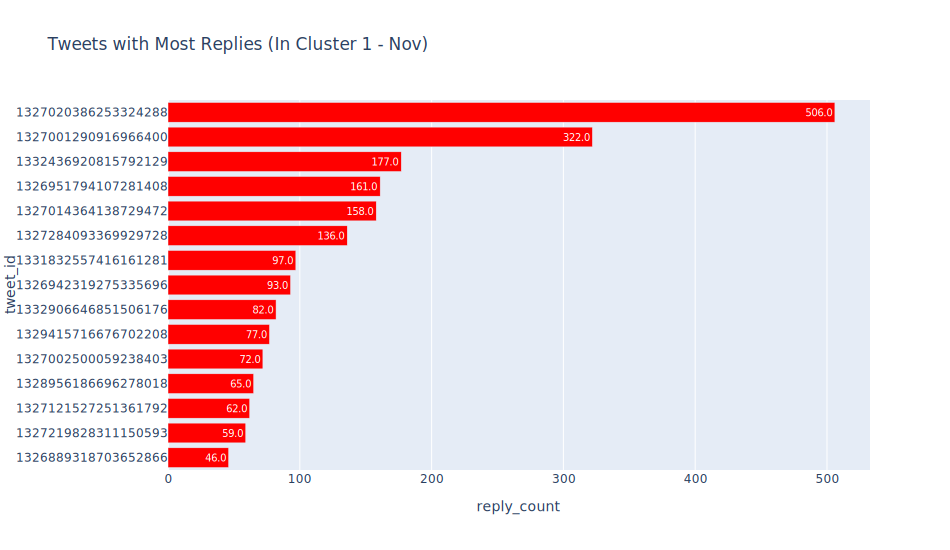

In [156]:
helpers.barh(top_replies[['tweet_id', 'reply_count']].head(15), "Tweets with Most Replies (In Cluster 1 - Nov)", c='red') # c=colors

In [157]:
top_replies.username.head(15)

3187                  Fandom
3138         Culture Crave 🍿
4839                 TheWrap
3106         Culture Crave 🍿
3174                  Fandom
3477                  People
4707         Price of Reason
3088               The Blast
4998      Deadline Hollywood
4138     We Got This Covered
3142         Price of Reason
4013                 Newsmax
3304               The Blast
3384             GamesRadar+
3049    Bounding Into Comics
Name: username, dtype: object

In [158]:
tweets[tweets.username == 'TheWrap'].text.value_counts().head()

amber heard, who played mera in 2018's "aquaman," hasn't been fired and is definitely returning for the sequel https://t.co/2sbhlzpmmq                                                                1
amber heard will return for “aquaman 2” — even though 1.5 million trolls signed a change .org petition to get her fired for trying to “ruin (johnny) depp in hollywood”\n\nhttps://t.co/2sbhlzpmmq    1
Name: text, dtype: int64


total number of tweets by "TheWrap": 2


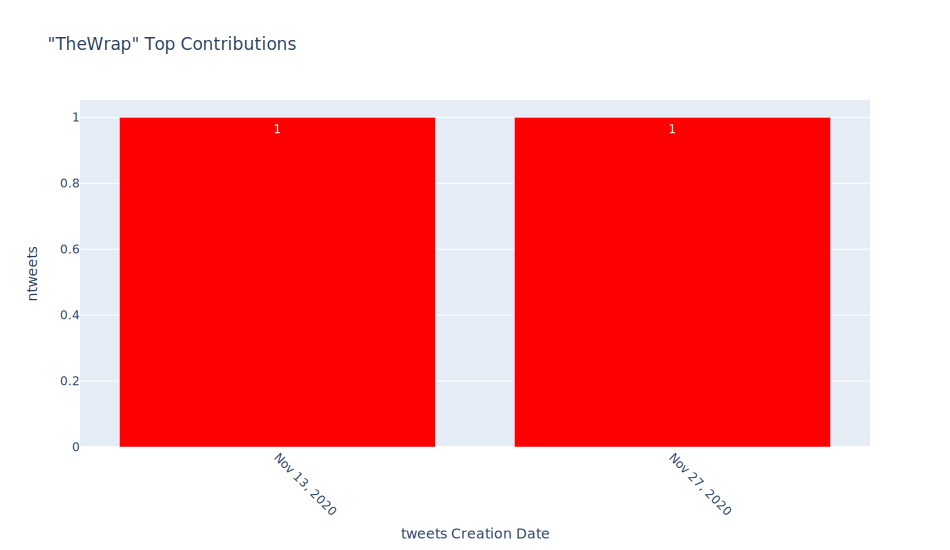

In [159]:
helpers.contr_peaks(tweets, "TheWrap", n=30, threshold=0)

<br>

<br>

<a id = 'conclusions'></a>
## Conclusions
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions"><b>Conclusions</b></a></li>
</ul>

<a id = 'end'><a/>
# END OF NOTEBOOK

<br>